# 1. Merging the TheNumbers.com and Box Office Mojo data sets


### Because those are the main sources of box offices data, we'll start with cleaning and merging them first before merging them with the rest of the data sets with movie features.

In [43]:
import pandas as pd
import numpy as np

- First we need to slice thenumbers.com ("tn.movie_budgets") to 2010-2018

In [13]:
df11 = pd.read_csv("tn.movie_budgets.csv")
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.1+ KB


In [14]:
df11['date']=pd.to_datetime(df11['release_date'])
df11['date'].head()

0   2009-12-18
1   2011-05-20
2   2019-06-07
3   2015-05-01
4   2017-12-15
Name: date, dtype: datetime64[ns]

In [15]:
df11['year'] = df11['date'].dt.year
df11['year'].head()

0    2009
1    2011
2    2019
3    2015
4    2017
Name: year, dtype: int64

In [16]:
df11_10 = df11.loc[df11['year'] > 2009, :]

In [17]:
df11_1018 = df11_10.loc[df11_10['year']<2019,:]
df11_1018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2124 entries, 1 to 5780
Data columns (total 8 columns):
id                   2124 non-null int64
release_date         2124 non-null object
movie                2124 non-null object
production_budget    2124 non-null object
domestic_gross       2124 non-null object
worldwide_gross      2124 non-null object
date                 2124 non-null datetime64[ns]
year                 2124 non-null int64
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 149.3+ KB


In [40]:
df11_1018.year.value_counts()

2015    338
2010    274
2014    255
2011    254
2013    238
2012    235
2016    219
2017    168
2018    143
Name: year, dtype: int64

- Check if there are duplicates

In [19]:
df11_1018[df11_1018.duplicated(['movie'])]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,date,year
408,9,"Nov 21, 2018",Robin Hood,"$99,000,000","$30,824,628","$84,747,441",2018-11-21,2018
5099,100,"Oct 25, 2013",The Square,"$1,500,000","$124,244","$176,262",2013-10-25,2013
5330,31,"Dec 31, 2012",Trance,"$950,000",$0,$0,2012-12-31,2012
5351,52,"Dec 31, 2012",Snitch,"$850,000",$0,$0,2012-12-31,2012


In [25]:
df11_1018.loc[df11_1018['movie']=='Robin Hood']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,date,year
38,39,"May 14, 2010",Robin Hood,"$210,000,000","$105,487,148","$322,459,006",2010-05-14,2010
408,9,"Nov 21, 2018",Robin Hood,"$99,000,000","$30,824,628","$84,747,441",2018-11-21,2018


In [24]:
df11_1018.loc[df11_1018['movie']=='The Square']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,date,year
3025,26,"Feb 22, 2013",Snitch,"$15,000,000","$42,930,462","$57,907,734",2013-02-22,2013
5351,52,"Dec 31, 2012",Snitch,"$850,000",$0,$0,2012-12-31,2012


In [24]:
df11_1018.loc[df11_1018['movie']=='Trace']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,date,year
3025,26,"Feb 22, 2013",Snitch,"$15,000,000","$42,930,462","$57,907,734",2013-02-22,2013
5351,52,"Dec 31, 2012",Snitch,"$850,000",$0,$0,2012-12-31,2012


In [24]:
df11_1018.loc[df11_1018['movie']=='Snitch']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,date,year
3025,26,"Feb 22, 2013",Snitch,"$15,000,000","$42,930,462","$57,907,734",2013-02-22,2013
5351,52,"Dec 31, 2012",Snitch,"$850,000",$0,$0,2012-12-31,2012


Since they're all actually different movies, we'll leave them as is.

 - Now we've to convert the budget columns from string to float.

In [26]:
df11_1018['production_budget']=df11_1018['production_budget'].replace('[\$,]', '', regex=True).astype(float)

/Users/ptw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
df11_1018['domestic_gross']=df11_1018['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)

/Users/ptw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
df11_1018['worldwide_gross']=df11_1018['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

/Users/ptw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
df11_1018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2124 entries, 1 to 5780
Data columns (total 8 columns):
id                   2124 non-null int64
release_date         2124 non-null object
movie                2124 non-null object
production_budget    2124 non-null float64
domestic_gross       2124 non-null float64
worldwide_gross      2124 non-null float64
date                 2124 non-null datetime64[ns]
year                 2124 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 229.3+ KB


 - Next, we'll upload the Box Office Mojo (bom.movie_gross) dataset and clean it

In [30]:
df1 = pd.read_csv("bom.movie_gross.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [31]:
df1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [32]:
df1['foreign_gross']=df1['foreign_gross'].replace('[\$,]', '', regex=True).astype(float)

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null float64
year              3387 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


- Once again, check for duplicates

In [37]:
df1[df1.duplicated(['title'])]

,title,studio,domestic_gross,foreign_gross,year,world_gross
3045,Bluebeard,WGUSA,43100.0,NaN,2017,NaN


In [38]:
df1.loc[df1['title']=='Bluebeard']

,title,studio,domestic_gross,foreign_gross,year,world_gross
317,Bluebeard,Strand,33500.0,5200.0,2010,38700.0
3045,Bluebeard,WGUSA,43100.0,NaN,2017,NaN


In [41]:
bmerge = df11_1018.merge(df1, left_on='movie', right_on='title',how='inner')
bmerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1236 entries, 0 to 1235
Data columns (total 14 columns):
id                   1236 non-null int64
release_date         1236 non-null object
movie                1236 non-null object
production_budget    1236 non-null float64
domestic_gross_x     1236 non-null float64
worldwide_gross      1236 non-null float64
date                 1236 non-null datetime64[ns]
year_x               1236 non-null int64
title                1236 non-null object
studio               1235 non-null object
domestic_gross_y     1234 non-null float64
foreign_gross        1078 non-null float64
year_y               1236 non-null int64
world_gross          1076 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(3), object(4)
memory usage: 144.8+ KB


In [44]:
np.unique(bmerge.movie.values).size

1232

# Here's the rub... because neither data set has ID, we have to merge with the movie titles as key. They're very long strings and the same movie is often not spelled the same way in the two data sets (e.g. "The Lego Movie" vs "The LEGO Movie". So we've to get creative. 

### There is a Python package called StringDist that returns the Levenshtein scores of two list of strings, which measures how similar the two strings are (the lower the score, the more similar). 

### So the strategy is to create two sets of strings based on the movie titles that did not get merged in each data set, feed the two strings to StringDist package to get their Levenstein score and turn it into a dataframe, and then merge the two datasets using the dataframe as a map.

# Step 1: create the two list of strings that did not get merged from the two dataset

- First, get the set of titles from each dataset

In [49]:
tnbt = set(df11_1018['movie'].values)
len(tnbt)

2120

In [50]:
tmbdt = set(df1['title'].values)
len(tmbdt)

3386

- Second, subtracting the sets from each other yields the list of titles that did not get merged

In [47]:
tndiff= tnbt - tmbdt
len(tndiff)

888

In [48]:
tndiff2 = tmbdt - tnbt
len(tndiff2)

2154

# Step 2: Create a map for the two data set using the Levenshstein score

- First, install the StringDist package in Python

In [51]:
!pip install StringDist

In [52]:
import stringdist as sd 
#Test run
sd.levenshtein_norm('test', 'testing')

0.42857142857142855

- Second, write a function that takes in two list of strings as arguments and return both strings and the Levenshtein score as a dataframe

In [53]:
def leven(tdiff, tdiff1):
    t1=[]
    t2=[]
    score=[]
    for i in tdiff:
        for j in tdiff1:
            t1.append(i)
            t2.append(j)
            score.append(sd.levenshtein_norm(i, j))     
    ldf = pd.DataFrame({'t1':t1, 't2':t2, 'score':score})
    return ldf

In [55]:
tnmap = leven(tndiff,tndiff2)
tnmap.head(100)

,t1,t2,score
0,Fight to the Finish,An Invisible Sign,0.842105
1,Fight to the Finish,Love & Mercy,0.842105
2,Fight to the Finish,The Cut,0.842105
3,Fight to the Finish,Serena,0.894737
4,Fight to the Finish,Love and Lost (Shi Gu),0.818182
5,Fight to the Finish,The Cup (2012),0.842105
6,Fight to the Finish,Bel Ami,0.894737
7,Fight to the Finish,GasLand,0.947368
8,Fight to the Finish,Clouds of Sils Maria,0.850000
9,Fight to the Finish,Searching,0.842105


- As you can see in the tnmap dataframe, the string pairs with high scores most likely won't yield a good match, so we'll only use string pairs with scores lower than 0.5

In [58]:
tnmap = tnmap[tnmap['score']<0.43]
tnmap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 694 entries, 1722061 to 1705945
Data columns (total 3 columns):
t1       694 non-null object
t2       694 non-null object
score    694 non-null float64
dtypes: float64(1), object(2)
memory usage: 21.7+ KB


In [59]:
tnmap = tnmap.sort_values(by='score')
tnmap.to_csv(r'/Users/ptw/dc_ds_06_03_19/module_1/week_3_project/data/b_levenshtein.csv')

# Step 3: Use the map we just created to merge the two datasets. The map contains the movie titles from both dataset that are most likely to be the same movie. 

### We'll first merge the map with one dataset, with the movie title in that dataset as key. And the resulted dataset will then be merged with the second dataset, with the movie title of the second dataset as key. 

### Because some of the matches in the map might not actually be the same movie, we'll also merge with the release year as key to minimize the number of merges of different movies

In [60]:
join1 = df11_1018.merge(tnmap, left_on='movie', right_on = 't1', how= 'inner')
join2 = join1.merge(df1, left_on=['t2','year'], right_on = ['title','year'], how='inner')


,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,date,year,t1,t2,score,title,studio,domestic_gross_y,foreign_gross,world_gross
0,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017-12-15,2017,Star Wars Ep. VIII: The Last Jedi,Star Wars: The Last Jedi,0.272727,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,1.332600e+09
1,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,2015-12-18,2015,Star Wars Ep. VII: The Force Awakens,Star Wars: The Force Awakens,0.222222,Star Wars: The Force Awakens,BV,936700000.0,1131.6,9.367011e+08
2,27,"May 4, 2012",The Avengers,225000000.0,623279547.0,1.517936e+09,2012-05-04,2012,The Avengers,The Oranges,0.333333,The Oranges,ATO,366000.0,NaN,NaN
3,27,"May 4, 2012",The Avengers,225000000.0,623279547.0,1.517936e+09,2012-05-04,2012,The Avengers,Marvel's The Avengers,0.428571,Marvel's The Avengers,BV,623400000.0,895500000.0,1.518900e+09
4,49,"May 5, 2017",Guardians of the Galaxy Vol 2,200000000.0,389813101.0,8.623162e+08,2017-05-05,2017,Guardians of the Galaxy Vol 2,Guardians of the Galaxy Vol. 2,0.033333,Guardians of the Galaxy Vol. 2,BV,389800000.0,473900000.0,8.637000e+08
5,51,"Mar 5, 2010",Alice in Wonderland,200000000.0,334191110.0,1.025491e+09,2010-03-05,2010,Alice in Wonderland,Alice in Wonderland (2010),0.269231,Alice in Wonderland (2010),BV,334200000.0,691300000.0,1.025500e+09
6,54,"Mar 8, 2013",Oz the Great and Powerful,200000000.0,234770996.0,4.903591e+08,2013-03-08,2013,Oz the Great and Powerful,Oz The Great and Powerful,0.040000,Oz The Great and Powerful,BV,234900000.0,258399999.0,4.933000e+08
7,58,"Dec 17, 2010",Tron: Legacy,200000000.0,172062763.0,4.000628e+08,2010-12-17,2010,Tron: Legacy,Tron Legacy,0.083333,Tron Legacy,BV,172100000.0,228000000.0,4.001000e+08
8,63,"May 28, 2010",Prince of Persia: Sands of Time,200000000.0,90759676.0,3.363597e+08,2010-05-28,2010,Prince of Persia: Sands of Time,Prince of Persia: The Sands of Time,0.114286,Prince of Persia: The Sands of Time,BV,90800000.0,245600000.0,3.364000e+08
9,70,"May 10, 2013",The Great Gatsby,190000000.0,144840419.0,3.510404e+08,2013-05-10,2013,The Great Gatsby,The Great Gatsby (2013),0.304348,The Great Gatsby (2013),WB,144800000.0,208800000.0,3.536000e+08


In [61]:
join2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 0 to 245
Data columns (total 16 columns):
id                   246 non-null int64
release_date         246 non-null object
movie                246 non-null object
production_budget    246 non-null float64
domestic_gross_x     246 non-null float64
worldwide_gross      246 non-null float64
date                 246 non-null datetime64[ns]
year                 246 non-null int64
t1                   246 non-null object
t2                   246 non-null object
score                246 non-null float64
title                246 non-null object
studio               246 non-null object
domestic_gross_y     244 non-null float64
foreign_gross        185 non-null float64
world_gross          183 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(2), object(6)
memory usage: 32.7+ KB


# Step 4: the least fun part... manually checking to make sure all the matched movies are in fact the same movie and upload the cleaned version

In [64]:
join2['dg_diff']=join2['domestic_gross_x']-join2['domestic_gross_y']
join2 = join2.sort_values(by= ['dg_diff'])
join2.head()

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,date,year,t1,t2,score,title,studio,domestic_gross_y,foreign_gross,world_gross,dg_diff
41,17,"Feb 12, 2010",Percy Jackson & the Olympians: The Lightning T...,95000000.0,88768303.0,223050874.0,2010-02-12,2010,Percy Jackson & the Olympians: The Lightning T...,Percy Jackson & The Olympians: The Lightning T...,0.020000,Percy Jackson & The Olympians: The Lightning T...,Fox,88800000.0,137700000.0,226500000.0,-31697.0
23,57,"Nov 18, 2011","The Twilight Saga: Breaking Dawn, Part 1",127500000.0,281287133.0,689420051.0,2011-11-18,2011,"The Twilight Saga: Breaking Dawn, Part 1",The Twilight Saga: Breaking Dawn Part 1,0.025000,The Twilight Saga: Breaking Dawn Part 1,Sum.,281300000.0,430900000.0,712200000.0,-12867.0
22,25,"Nov 16, 2012","The Twilight Saga: Breaking Dawn, Part 2",136200000.0,292324737.0,829724737.0,2012-11-16,2012,"The Twilight Saga: Breaking Dawn, Part 2",The Twilight Saga: Breaking Dawn Part 2,0.025000,The Twilight Saga: Breaking Dawn Part 2,LG/S,292300000.0,537400000.0,829700000.0,24737.0
11,85,"Nov 18, 2016",Fantastic Beasts and Where to Find Them,180000000.0,234037575.0,802402853.0,2016-11-18,2016,Fantastic Beasts and Where to Find Them,Fantastic Beasts and Where To Find Them,0.025641,Fantastic Beasts and Where To Find Them,WB,234000000.0,580000000.0,814000000.0,37575.0
91,48,"May 30, 2014",A Million Ways to Die in The West,40000000.0,42720965.0,86778557.0,2014-05-30,2014,A Million Ways to Die in The West,A Million Ways to Die in the West,0.030303,A Million Ways to Die in the West,Uni.,43100000.0,44100000.0,87200000.0,-379035.0


In [65]:
join2.to_csv(r'/Users/ptw/dc_ds_06_03_19/module_1/week_3_project/data/join2.csv')

# Step 5: Finally, we can clean join this cleaned dataset with the one containing the successful merges

In [72]:
tnmatch = pd.read_csv('join2_cleaned.csv')
tnmatch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 18 columns):
Unnamed: 0           187 non-null int64
id                   187 non-null int64
release_date         187 non-null object
movie                187 non-null object
production_budget    187 non-null int64
domestic_gross_x     187 non-null int64
worldwide_gross      187 non-null int64
date                 187 non-null object
year                 187 non-null int64
t1                   187 non-null object
t2                   187 non-null object
score                187 non-null float64
title                187 non-null object
studio               187 non-null object
domestic_gross_y     187 non-null int64
foreign_gross        161 non-null float64
world_gross          161 non-null float64
dg_diff              187 non-null int64
dtypes: float64(3), int64(8), object(7)
memory usage: 26.4+ KB


In [73]:
tnmatch.drop(['Unnamed: 0','t1','t2', 'score','dg_diff'],axis=1, inplace=True)
tnmatch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 13 columns):
id                   187 non-null int64
release_date         187 non-null object
movie                187 non-null object
production_budget    187 non-null int64
domestic_gross_x     187 non-null int64
worldwide_gross      187 non-null int64
date                 187 non-null object
year                 187 non-null int64
title                187 non-null object
studio               187 non-null object
domestic_gross_y     187 non-null int64
foreign_gross        161 non-null float64
world_gross          161 non-null float64
dtypes: float64(2), int64(6), object(5)
memory usage: 19.1+ KB


In [74]:
bmerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1236 entries, 0 to 1235
Data columns (total 14 columns):
id                   1236 non-null int64
release_date         1236 non-null object
movie                1236 non-null object
production_budget    1236 non-null float64
domestic_gross_x     1236 non-null float64
worldwide_gross      1236 non-null float64
date                 1236 non-null datetime64[ns]
year_x               1236 non-null int64
title                1236 non-null object
studio               1235 non-null object
domestic_gross_y     1234 non-null float64
foreign_gross        1078 non-null float64
year_y               1236 non-null int64
world_gross          1076 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(3), object(4)
memory usage: 144.8+ KB


In [76]:
bmerge.drop(['year_y'], axis=1, inplace=True)
bmerge.rename(columns={'year_x':'year'}, inplace=True)
bmerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1236 entries, 0 to 1235
Data columns (total 13 columns):
id                   1236 non-null int64
release_date         1236 non-null object
movie                1236 non-null object
production_budget    1236 non-null float64
domestic_gross_x     1236 non-null float64
worldwide_gross      1236 non-null float64
date                 1236 non-null datetime64[ns]
year                 1236 non-null int64
title                1236 non-null object
studio               1235 non-null object
domestic_gross_y     1234 non-null float64
foreign_gross        1078 non-null float64
world_gross          1076 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory usage: 135.2+ KB


In [79]:
bm_all = bmerge.append(tnmatch)
bm_all.head(100)

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,date,year,title,studio,domestic_gross_y,foreign_gross,world_gross
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011-05-20 00:00:00,2011,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000.0,1.045700e+09
1,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015-05-01 00:00:00,2015,Avengers: Age of Ultron,BV,459000000.0,946400000.0,1.405400e+09
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,2018-04-27 00:00:00,2018,Avengers: Infinity War,BV,678800000.0,1369.5,6.788014e+08
3,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,2017-11-17 00:00:00,2017,Justice League,WB,229000000.0,428900000.0,6.579000e+08
4,10,"Nov 6, 2015",Spectre,300000000.0,200074175.0,8.796209e+08,2015-11-06 00:00:00,2015,Spectre,Sony,200100000.0,680600000.0,8.807000e+08
5,11,"Jul 20, 2012",The Dark Knight Rises,275000000.0,448139099.0,1.084439e+09,2012-07-20 00:00:00,2012,The Dark Knight Rises,WB,448100000.0,636800000.0,1.084900e+09
6,12,"May 25, 2018",Solo: A Star Wars Story,275000000.0,213767512.0,3.931513e+08,2018-05-25 00:00:00,2018,Solo: A Star Wars Story,BV,213800000.0,179200000.0,3.930000e+08
7,13,"Jul 2, 2013",The Lone Ranger,275000000.0,89302115.0,2.600021e+08,2013-07-02 00:00:00,2013,The Lone Ranger,BV,89300000.0,171200000.0,2.605000e+08
8,14,"Mar 9, 2012",John Carter,275000000.0,73058679.0,2.827781e+08,2012-03-09 00:00:00,2012,John Carter,BV,73100000.0,211100000.0,2.842000e+08
9,15,"Nov 24, 2010",Tangled,260000000.0,200821936.0,5.864772e+08,2010-11-24 00:00:00,2010,Tangled,BV,200800000.0,391000000.0,5.918000e+08


In [83]:
bm_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1423 entries, 0 to 186
Data columns (total 13 columns):
id                   1423 non-null int64
release_date         1423 non-null object
movie                1423 non-null object
production_budget    1423 non-null float64
domestic_gross_x     1423 non-null float64
worldwide_gross      1423 non-null float64
date                 1423 non-null object
year                 1423 non-null int64
title                1423 non-null object
studio               1422 non-null object
domestic_gross_y     1421 non-null float64
foreign_gross        1239 non-null float64
world_gross          1237 non-null float64
dtypes: float64(6), int64(2), object(5)
memory usage: 155.6+ KB


# Now that we've identified the true overlaps of the two datasets, we can do an outer join with the two budget dataset without creating multiple entries for the same movie.

### Because there are 2124 and 3387 obs in the two datasets respectively, and the overlap is 1423. We should have a dataset with about 4100 obs after the merge.

In [82]:
3387+2124-1423

4088

In [89]:
b1 = bm_all.merge(df11_1018, left_on='movie', right_on = 'movie', how= 'outer')
b1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2132 entries, 0 to 2131
Data columns (total 20 columns):
id_x                   1431 non-null float64
release_date_x         1431 non-null object
movie                  2132 non-null object
production_budget_x    1431 non-null float64
domestic_gross_x       1431 non-null float64
worldwide_gross_x      1431 non-null float64
date_x                 1431 non-null object
year_x                 1431 non-null float64
title                  1431 non-null object
studio                 1430 non-null object
domestic_gross_y       1429 non-null float64
foreign_gross          1243 non-null float64
world_gross            1241 non-null float64
id_y                   2132 non-null int64
release_date_y         2132 non-null object
production_budget_y    2132 non-null float64
domestic_gross         2132 non-null float64
worldwide_gross_y      2132 non-null float64
date_y                 2132 non-null datetime64[ns]
year_y                 2132 non-null in

In [99]:
b2 = b1.merge(df1, left_on='title', right_on='title', suffixes=('_l','_r'), how='outer')
b2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4100 entries, 0 to 4099
Data columns (total 25 columns):
id_x                   1431 non-null float64
release_date_x         1431 non-null object
movie                  2132 non-null object
production_budget_x    1431 non-null float64
domestic_gross_x       1431 non-null float64
worldwide_gross_x      1431 non-null float64
date_x                 1431 non-null object
year_x                 1431 non-null float64
title                  3399 non-null object
studio_l               1430 non-null object
domestic_gross_y       1429 non-null float64
foreign_gross_l        1243 non-null float64
world_gross_l          1241 non-null float64
id_y                   2132 non-null float64
release_date_y         2132 non-null object
production_budget_y    2132 non-null float64
domestic_gross_l       2132 non-null float64
worldwide_gross_y      2132 non-null float64
date_y                 2132 non-null datetime64[ns]
year_y                 2132 non-null 

In [100]:
b2.columns

Index(['id_x', 'release_date_x', 'movie', 'production_budget_x',
       'domestic_gross_x', 'worldwide_gross_x', 'date_x', 'year_x', 'title',
       'studio_l', 'domestic_gross_y', 'foreign_gross_l', 'world_gross_l',
       'id_y', 'release_date_y', 'production_budget_y', 'domestic_gross_l',
       'worldwide_gross_y', 'date_y', 'year_y', 'studio_r', 'domestic_gross_r',
       'foreign_gross_r', 'year', 'world_gross_r'],
      dtype='object')

In [101]:
b2.drop(['id_x', 'release_date_x','production_budget_x',
        'domestic_gross_x', 'worldwide_gross_x', 'date_x', 
        'year_x','studio_l', 'domestic_gross_y', 'foreign_gross_l', 'world_gross_l',],axis=1, inplace=True)
b2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4100 entries, 0 to 4099
Data columns (total 14 columns):
movie                  2132 non-null object
title                  3399 non-null object
id_y                   2132 non-null float64
release_date_y         2132 non-null object
production_budget_y    2132 non-null float64
domestic_gross_l       2132 non-null float64
worldwide_gross_y      2132 non-null float64
date_y                 2132 non-null datetime64[ns]
year_y                 2132 non-null float64
studio_r               3394 non-null object
domestic_gross_r       3371 non-null float64
foreign_gross_r        2043 non-null float64
year                   3399 non-null float64
world_gross_r          2015 non-null float64
dtypes: datetime64[ns](1), float64(9), object(4)
memory usage: 480.5+ KB


### We noticed that the bom dataset has some foreign gross figures that are wrong. E.g. the Star Wars Force Awakens foreign gross is 1131.6 in the data set, which is off by a factor of a million according to the tn.movie_budgets dataset. So we're going to refer thenumbers.com ("tn.movie_budgets") whenever data is available, and only use the Box Office Mojo data when it's the only data available.

In [104]:
b2.loc[b2['domestic_gross_l'].isnull() == True, 'domestic_gross'] = b2['domestic_gross_r']

In [111]:
b2.loc[b2['domestic_gross_l'].isnull() == False, 'domestic_gross'] = b2['domestic_gross_l']

In [112]:
b2.domestic_gross.describe()

count    4.074000e+03
mean     2.476849e+07
std      6.217773e+07
min      0.000000e+00
25%      4.980000e+04
50%      7.085000e+05
75%      2.024619e+07
max      9.366622e+08
Name: domestic_gross, dtype: float64

In [113]:
b2.loc[b2['worldwide_gross_y'].isnull() == True, 'worldwide_gross'] = b2['world_gross_r']

In [114]:
b2.loc[b2['worldwide_gross_y'].isnull() == False, 'worldwide_gross'] = b2['worldwide_gross_y']

In [116]:
b2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4100 entries, 0 to 4099
Data columns (total 16 columns):
movie                  2132 non-null object
title                  3399 non-null object
id_y                   2132 non-null float64
release_date_y         2132 non-null object
production_budget_y    2132 non-null float64
domestic_gross_l       2132 non-null float64
worldwide_gross_y      2132 non-null float64
date_y                 2132 non-null datetime64[ns]
year_y                 2132 non-null float64
studio_r               3394 non-null object
domestic_gross_r       3371 non-null float64
foreign_gross_r        2043 non-null float64
year                   3399 non-null float64
world_gross_r          2015 non-null float64
domestic_gross         4074 non-null float64
worldwide_gross        2906 non-null float64
dtypes: datetime64[ns](1), float64(11), object(4)
memory usage: 704.5+ KB


In [118]:
b2.columns

Index(['movie', 'title', 'id_y', 'release_date_y', 'production_budget_y',
       'domestic_gross_l', 'worldwide_gross_y', 'date_y', 'year_y', 'studio_r',
       'domestic_gross_r', 'foreign_gross_r', 'year', 'world_gross_r',
       'domestic_gross', 'worldwide_gross'],
      dtype='object')

In [120]:
b2.drop(['domestic_gross_l', 'worldwide_gross_y',
       'domestic_gross_r', 'foreign_gross_r', 'year_y', 'world_gross_r',], axis=1, inplace=True)
b2.head()

,movie,title,id_y,release_date_y,production_budget_y,date_y,studio_r,year,domestic_gross,worldwide_gross
0,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2.0,"May 20, 2011",410600000.0,2011-05-20,BV,2011.0,241063875.0,1.045664e+09
1,Avengers: Age of Ultron,Avengers: Age of Ultron,4.0,"May 1, 2015",330600000.0,2015-05-01,BV,2015.0,459005868.0,1.403014e+09
2,Avengers: Infinity War,Avengers: Infinity War,7.0,"Apr 27, 2018",300000000.0,2018-04-27,BV,2018.0,678815482.0,2.048134e+09
3,Justice League,Justice League,9.0,"Nov 17, 2017",300000000.0,2017-11-17,WB,2017.0,229024295.0,6.559452e+08
4,Spectre,Spectre,10.0,"Nov 6, 2015",300000000.0,2015-11-06,Sony,2015.0,200074175.0,8.796209e+08


In [117]:
b2.to_csv(r'/Users/ptw/dc_ds_06_03_19/module_1/week_3_project/data/b2cleaned.csv')

# 2. Now we have a clean a most comprehensive box office/budget dataset, we can merge it with the rest of the dataset with movie features. First we'll merge budget dataset with w/ imdb.title.akas.csv, which has both the title name and title_id that links obs with the rest of the datasets.

In [121]:
df3 = pd.read_csv('imdb.title.akas.csv')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
title_id             331703 non-null object
ordering             331703 non-null int64
title                331703 non-null object
region               278410 non-null object
language             41715 non-null object
types                168447 non-null object
attributes           14925 non-null object
is_original_title    331678 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


## Because we've to merge the budget dataframe with the features dataframe using the title as key, we'll have to use the Levenshtein score method again 

### The strategy is to first do a merge with the title.akas.cvs dataframe to get the title ID using the Levenshtein method, then drop duplicates by title ID after merging additional features from the title.akas.cvs.

In [158]:
tidmerge = b2.merge(df3, left_on='title', right_on='title',how='inner')
tidmerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11076 entries, 0 to 11075
Data columns (total 20 columns):
movie                  6421 non-null object
title                  11076 non-null object
id_y                   6421 non-null float64
release_date_y         6421 non-null object
production_budget_y    6421 non-null float64
date_y                 6421 non-null datetime64[ns]
studio_r               11068 non-null object
year                   11076 non-null float64
domestic_gross         11013 non-null float64
worldwide_gross        8169 non-null float64
title_id               11076 non-null object
ordering               11076 non-null int64
region                 8718 non-null object
language               1812 non-null object
types                  8319 non-null object
attributes             361 non-null object
is_original_title      11075 non-null float64
festival               8319 non-null object
D3                     361 non-null object
IMAX                   361 non-null o

# Step 1: create the two list of strings that did not get merged from the two dataset

- First, get the set of titles from each dataset

In [166]:
tnbt1 = set(b2['title'].dropna().values)
len(tnbt1)

3386

In [167]:
tmbdt1 = set(df3['title'].dropna().values)
len(tmbdt1)

252781

- Second, subtracting the sets from each other yields the list of titles that did not get merged

In [168]:
tndiff1= tnbt1 - tmbdt1
len(tndiff1)

647

In [169]:
tndiff21 = tmbdt1 - tnbt1
len(tndiff21)

250042

# Step 2: Create a map for the two data set using the Levenshstein score

In [171]:
tnmap1 = leven(tndiff1,tndiff21)
tnmap1.head(100)

,t1,t2,score
0,I'll See You In My Dreams,Legendás harcos,0.840000
1,I'll See You In My Dreams,Balka Illi,0.880000
2,I'll See You In My Dreams,Absentul,0.920000
3,I'll See You In My Dreams,Fat Boys,0.840000
4,I'll See You In My Dreams,Zal,0.960000
5,I'll See You In My Dreams,8 Minutes Ahead,0.800000
6,I'll See You In My Dreams,Conjuring Spirit,0.880000
7,I'll See You In My Dreams,O Valor de um Homem,0.760000
8,I'll See You In My Dreams,Luzeri,0.920000
9,I'll See You In My Dreams,Ekspeditionen til verdens ende,0.866667


- As you can see in the tnmap dataframe, the string pairs with high scores most likely won't yield a good match, so we'll only use string pairs with scores lower than 0.5

In [172]:
tnmap2 = tnmap1[tnmap1['score']<0.3]
tnmap2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4452 entries, 18250 to 161765819
Data columns (total 3 columns):
t1       4452 non-null object
t2       4452 non-null object
score    4452 non-null float64
dtypes: float64(1), object(2)
memory usage: 139.1+ KB


In [173]:
tnmap2.to_csv(r'/Users/ptw/dc_ds_06_03_19/module_1/week_3_project/data/tnnmap2.csv')

### Step 3: because the title_ID dataframe doesn't have the year variable, there's no other veriable to merge the dataframe than the titles, so we need to manually check the matched movies are in fact the same movie and upload the cleaned version before using it as a map.

In [174]:
tnmap2 = pd.read_csv('tnnmap2_cleaned.csv')
tnmap2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 4 columns):
Unnamed: 0    311 non-null int64
t1            311 non-null object
t2            311 non-null object
score         311 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 9.8+ KB


# Step 4: Use the map we just created to merge the two datasets. The map contains the movie titles from both dataset that are most likely to be the same movie. 

### We'll first merge the map with one dataset, with the movie title in that dataset as key. And the resulted dataset will then be merged with the second dataset, with the movie title of the second dataset as key. 

### Because some of the matches in the map might not actually be the same movie, we'll also merge with the release year as key to minimize the number of merges of different movies

In [175]:
joina1 = b2.merge(tnmap2, left_on='title', right_on = 't1', how= 'inner')
joina2 = joina1.merge(df3, left_on=['t2'], right_on = ['title'], how='inner')


In [176]:
joina2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 0 to 686
Data columns (total 25 columns):
movie                  274 non-null object
title_x                687 non-null object
id_y                   274 non-null float64
release_date_y         274 non-null object
production_budget_y    274 non-null float64
date_y                 274 non-null datetime64[ns]
studio_r               687 non-null object
year                   687 non-null float64
domestic_gross         684 non-null float64
worldwide_gross        425 non-null float64
Unnamed: 0             687 non-null int64
t1                     687 non-null object
t2                     687 non-null object
score                  687 non-null float64
title_id               687 non-null object
ordering               687 non-null int64
title_y                687 non-null object
region                 516 non-null object
language               116 non-null object
types                  486 non-null object
attributes             

# Step 5: Finally, we can clean join this cleaned dataset with the one containing the successful merges

In [178]:
joina2.drop(['Unnamed: 0','t1','t2', 'score'],axis=1, inplace=True)
joina2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 0 to 686
Data columns (total 21 columns):
movie                  274 non-null object
title_x                687 non-null object
id_y                   274 non-null float64
release_date_y         274 non-null object
production_budget_y    274 non-null float64
date_y                 274 non-null datetime64[ns]
studio_r               687 non-null object
year                   687 non-null float64
domestic_gross         684 non-null float64
worldwide_gross        425 non-null float64
title_id               687 non-null object
ordering               687 non-null int64
title_y                687 non-null object
region                 516 non-null object
language               116 non-null object
types                  486 non-null object
attributes             29 non-null object
is_original_title      687 non-null float64
festival               486 non-null object
D3                     29 non-null object
IMAX                   2

In [179]:
tidmerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11076 entries, 0 to 11075
Data columns (total 20 columns):
movie                  6421 non-null object
title                  11076 non-null object
id_y                   6421 non-null float64
release_date_y         6421 non-null object
production_budget_y    6421 non-null float64
date_y                 6421 non-null datetime64[ns]
studio_r               11068 non-null object
year                   11076 non-null float64
domestic_gross         11013 non-null float64
worldwide_gross        8169 non-null float64
title_id               11076 non-null object
ordering               11076 non-null int64
region                 8718 non-null object
language               1812 non-null object
types                  8319 non-null object
attributes             361 non-null object
is_original_title      11075 non-null float64
festival               8319 non-null object
D3                     361 non-null object
IMAX                   361 non-null o

In [180]:
joina2.drop(['title_y'], axis=1, inplace=True)
joina2.rename(columns={'title_x':'title'}, inplace=True)
joina2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 0 to 686
Data columns (total 20 columns):
movie                  274 non-null object
title                  687 non-null object
id_y                   274 non-null float64
release_date_y         274 non-null object
production_budget_y    274 non-null float64
date_y                 274 non-null datetime64[ns]
studio_r               687 non-null object
year                   687 non-null float64
domestic_gross         684 non-null float64
worldwide_gross        425 non-null float64
title_id               687 non-null object
ordering               687 non-null int64
region                 516 non-null object
language               116 non-null object
types                  486 non-null object
attributes             29 non-null object
is_original_title      687 non-null float64
festival               486 non-null object
D3                     29 non-null object
IMAX                   29 non-null object
dtypes: datetime64[ns](1)

In [181]:
tid_all = tidmerge.append(joina2)
tid_all.head(100)

,movie,title,id_y,release_date_y,production_budget_y,date_y,studio_r,year,domestic_gross,worldwide_gross,title_id,ordering,region,language,types,attributes,is_original_title,festival,D3,IMAX
0,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2.0,"May 20, 2011",410600000.0,2011-05-20,BV,2011.0,241063875.0,1.045664e+09,tt1298650,14,US,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2.0,"May 20, 2011",410600000.0,2011-05-20,BV,2011.0,241063875.0,1.045664e+09,tt1298650,19,NaN,NaN,original,NaN,1.0,False,NaN,NaN
2,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2.0,"May 20, 2011",410600000.0,2011-05-20,BV,2011.0,241063875.0,1.045664e+09,tt1298650,23,CA,en,imdbDisplay,NaN,0.0,False,NaN,NaN
3,Avengers: Age of Ultron,Avengers: Age of Ultron,4.0,"May 1, 2015",330600000.0,2015-05-01,BV,2015.0,459005868.0,1.403014e+09,tt2395427,15,US,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,Avengers: Age of Ultron,Avengers: Age of Ultron,4.0,"May 1, 2015",330600000.0,2015-05-01,BV,2015.0,459005868.0,1.403014e+09,tt2395427,19,DE,NaN,imdbDisplay,NaN,0.0,False,NaN,NaN
5,Avengers: Age of Ultron,Avengers: Age of Ultron,4.0,"May 1, 2015",330600000.0,2015-05-01,BV,2015.0,459005868.0,1.403014e+09,tt2395427,24,NaN,NaN,original,NaN,1.0,False,NaN,NaN
6,Avengers: Age of Ultron,Avengers: Age of Ultron,4.0,"May 1, 2015",330600000.0,2015-05-01,BV,2015.0,459005868.0,1.403014e+09,tt2395427,3,IT,NaN,imdbDisplay,NaN,0.0,False,NaN,NaN
7,Avengers: Age of Ultron,Avengers: Age of Ultron,4.0,"May 1, 2015",330600000.0,2015-05-01,BV,2015.0,459005868.0,1.403014e+09,tt2395427,9,CZ,NaN,imdbDisplay,NaN,0.0,False,NaN,NaN
8,Avengers: Infinity War,Avengers: Infinity War,7.0,"Apr 27, 2018",300000000.0,2018-04-27,BV,2018.0,678815482.0,2.048134e+09,tt4154756,10,AR,NaN,imdbDisplay,NaN,0.0,False,NaN,NaN
9,Avengers: Infinity War,Avengers: Infinity War,7.0,"Apr 27, 2018",300000000.0,2018-04-27,BV,2018.0,678815482.0,2.048134e+09,tt4154756,13,XWW,en,imdbDisplay,NaN,0.0,False,NaN,NaN


In [182]:
tid_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11763 entries, 0 to 686
Data columns (total 20 columns):
movie                  6695 non-null object
title                  11763 non-null object
id_y                   6695 non-null float64
release_date_y         6695 non-null object
production_budget_y    6695 non-null float64
date_y                 6695 non-null datetime64[ns]
studio_r               11755 non-null object
year                   11763 non-null float64
domestic_gross         11697 non-null float64
worldwide_gross        8594 non-null float64
title_id               11763 non-null object
ordering               11763 non-null int64
region                 9234 non-null object
language               1928 non-null object
types                  8805 non-null object
attributes             390 non-null object
is_original_title      11762 non-null float64
festival               8805 non-null object
D3                     390 non-null object
IMAX                   390 non-null obj

### We'll create a new dataframe w/ additional features from the title.akas dataset that describe whether the movie has special editions released, e.g. film festival, 3D or IMAX.

In [133]:
df3['festival']= df3.types.str.contains('festival', regex= False)
df3.festival.value_counts()

False    165139
True       3308
Name: festival, dtype: int64

In [134]:
df3['D3']= df3.attributes.str.contains('3-D', regex= False)
df3.D3.value_counts()

False    14633
True       292
Name: D3, dtype: int64

In [135]:
df3['IMAX']= df3.attributes.str.contains('IMAX', regex= False)
df3.IMAX.value_counts()

False    14890
True        35
Name: IMAX, dtype: int64

In [137]:
df3c1 = df3.groupby('title_id')['festival','D3','IMAX'].sum()
df3c1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122302 entries, tt0063540 to tt9916170
Data columns (total 3 columns):
festival    122302 non-null object
D3          122302 non-null int64
IMAX        122302 non-null int64
dtypes: int64(2), object(1)
memory usage: 3.7+ MB


In [138]:
df3c1 = df3c1.reset_index([0,'title_id'])
df3c1.head()

#ndf3 = ndf3.reset_index([0,'tconst'])

,title_id,festival,D3,IMAX
0,tt0063540,0,0,0
1,tt0066787,0,0,0
2,tt0069049,0,0,0
3,tt0069204,0,0,0
4,tt0100275,0,0,0


### We'll create another dataframe that counts the number of title, region, language, and special editions that each movie has, and then combine the two dataframes with special features

In [139]:
df3c2 = df3.groupby('title_id')['title','region','language','types','attributes'].nunique()
df3c2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 122302 entries, tt0063540 to tt9916170
Data columns (total 5 columns):
title         122302 non-null int64
region        122302 non-null int64
language      122302 non-null int64
types         122302 non-null int64
attributes    122302 non-null int64
dtypes: int64(5)
memory usage: 5.6+ MB


In [140]:
df3c2 = df3c2.reset_index([0,'title_id'])
df3c2.head()

#ndf3 = ndf3.reset_index([0,'tconst'])

,title_id,title,region,language,types,attributes
0,tt0063540,3,1,1,1,2
1,tt0066787,3,2,1,1,0
2,tt0069049,8,12,0,2,0
3,tt0069204,3,1,2,1,0
4,tt0100275,4,3,1,2,1


In [183]:
df3c = df3c1.join(df3c2, rsuffix='title_id')
df3c.head()

,title_id,festival,D3,IMAX,title_idtitle_id,title,region,language,types,attributes
0,tt0063540,0,0,0,tt0063540,3,1,1,1,2
1,tt0066787,0,0,0,tt0066787,3,2,1,1,0
2,tt0069049,0,0,0,tt0069049,8,12,0,2,0
3,tt0069204,0,0,0,tt0069204,3,1,2,1,0
4,tt0100275,0,0,0,tt0100275,4,3,1,2,1


### Finally, we'll merge this dataframe with special features with the budget dataframe

In [184]:
tidmerge1 = tid_all.merge(df3c, left_on='title_id', right_on='title_id',how='inner')
tidmerge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11763 entries, 0 to 11762
Data columns (total 29 columns):
movie                  6695 non-null object
title_x                11763 non-null object
id_y                   6695 non-null float64
release_date_y         6695 non-null object
production_budget_y    6695 non-null float64
date_y                 6695 non-null datetime64[ns]
studio_r               11755 non-null object
year                   11763 non-null float64
domestic_gross         11697 non-null float64
worldwide_gross        8594 non-null float64
title_id               11763 non-null object
ordering               11763 non-null int64
region_x               9234 non-null object
language_x             1928 non-null object
types_x                8805 non-null object
attributes_x           390 non-null object
is_original_title      11762 non-null float64
festival_x             8805 non-null object
D3_x                   390 non-null object
IMAX_x                 390 non-null o

### Drop duplicates

In [185]:
tbaka = tidmerge1.drop_duplicates(subset= 'title_id' , keep='first')
tbaka.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3859 entries, 0 to 11761
Data columns (total 29 columns):
movie                  1813 non-null object
title_x                3859 non-null object
id_y                   1813 non-null float64
release_date_y         1813 non-null object
production_budget_y    1813 non-null float64
date_y                 1813 non-null datetime64[ns]
studio_r               3856 non-null object
year                   3859 non-null float64
domestic_gross         3830 non-null float64
worldwide_gross        2532 non-null float64
title_id               3859 non-null object
ordering               3859 non-null int64
region_x               2848 non-null object
language_x             692 non-null object
types_x                2488 non-null object
attributes_x           155 non-null object
is_original_title      3858 non-null float64
festival_x             2488 non-null object
D3_x                   155 non-null object
IMAX_x                 155 non-null object
fes

In [191]:
tbaka.columns

Index(['movie', 'title_x', 'id_y', 'release_date_y', 'production_budget_y',
       'date_y', 'studio_r', 'year', 'domestic_gross', 'worldwide_gross',
       'title_id', 'ordering', 'region_x', 'language_x', 'types_x',
       'attributes_x', 'is_original_title', 'festival_x', 'D3_x', 'IMAX_x',
       'festival_y', 'D3_y', 'IMAX_y', 'title_idtitle_id', 'title_y',
       'region_y', 'language_y', 'types_y', 'attributes_y'],
      dtype='object')

### After the painstaking work, we're able to match most (~3900 out of 4000) of the obs in our budget data with a title ID! Now we'll clean it a bit before the next merge.

In [192]:
tbaka.drop(['ordering','region_x','language_x','types_x','attributes_x', 'is_original_title', 'festival_x', 'D3_x', 'IMAX_x', 'title_idtitle_id'],axis=1, inplace=True)


/Users/ptw/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [195]:
tbaka.columns

Index(['movie', 'title_x', 'id_y', 'release_date_y', 'production_budget_y',
       'date_y', 'studio_r', 'year', 'domestic_gross', 'worldwide_gross',
       'title_id', 'festival_y', 'D3_y', 'IMAX_y', 'title_y', 'region_y',
       'language_y', 'types_y', 'attributes_y'],
      dtype='object')

In [ ]:
tbaka.rename(columns={'title_x':'title', 'release_date_y':'release_date', 'production_budget_y': 'production_budget',
       'date_y': 'date', 'studio_r': 'studio', 'festival_y': 'festival', 'D3_y' :'D3', 'IMAX_y': 'IMAX', 'region_y': 'region',
       'language_y': 'language', 'types_y':'types', 'attributes_y':'attributes'}, inplace=True)

In [198]:
tbaka.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3859 entries, 0 to 11761
Data columns (total 19 columns):
movie                1813 non-null object
title                3859 non-null object
id_y                 1813 non-null float64
release_date         1813 non-null object
production_budget    1813 non-null float64
date                 1813 non-null datetime64[ns]
studio               3856 non-null object
year                 3859 non-null float64
domestic_gross       3830 non-null float64
worldwide_gross      2532 non-null float64
title_id             3859 non-null object
festival             3859 non-null object
D3                   3859 non-null int64
IMAX                 3859 non-null int64
title_y              3859 non-null int64
region               3859 non-null int64
language             3859 non-null int64
types                3859 non-null int64
attributes           3859 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(7), object(6)
memory usage: 603.0+ KB


## 3. With title_id, the future merges will be much easier. Now we'll merge imdb.title.basic with the main dataset

In [201]:
df4 = pd.read_csv('imdb.title.basics.csv')
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


## -Create a list of unique genres values

In [202]:
lgenre = list(set(df4['genres'].dropna().values))
lgenre

['Drama,Family,Western',
 'Action,Documentary,History',
 'Action,Comedy,War',
 'Mystery,War',
 'Drama,Sci-Fi,Thriller',
 'Documentary,Music,Sport',
 'Action,Crime,Documentary',
 'Drama,Musical,Romance',
 'Action,Adventure',
 'History,Romance',
 'Drama,Mystery,Romance',
 'Action,Crime,Sport',
 'Adult,Comedy',
 'Sci-Fi,Thriller',
 'Crime,Documentary,Family',
 'Family,Fantasy,Sci-Fi',
 'Action,Crime,Romance',
 'Romance,War',
 'Mystery,Romance,Sci-Fi',
 'Documentary,Family,War',
 'Thriller,War',
 'Action,Fantasy,Sci-Fi',
 'Sport',
 'Drama,Fantasy,War',
 'Drama,Music,Sci-Fi',
 'Action,Sci-Fi,War',
 'Action,Comedy,Crime',
 'Biography,Comedy,Romance',
 'Action,Adventure,Sport',
 'Crime,Drama,Horror',
 'Animation,Comedy,Drama',
 'Comedy,Musical',
 'Action,Drama,Romance',
 'Crime,Romance',
 'Fantasy,History,Romance',
 'Animation,Comedy,Music',
 'Action,Musical',
 'Adventure,Animation,Crime',
 'Crime,Family',
 'Action,Documentary,Fantasy',
 'Horror,Western',
 'Comedy,Documentary,War',
 'Comedy,F

In [203]:
sgenre=[]
for i in lgenre:
    for s in i.split(','):
        sgenre.append(s)    

In [204]:
ugenre = set(sgenre)
ugenre

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western'}

## Now we'll make a dummy variable that equals "True" (or 1) when the movie belongs to the genre, and False (or 0) otherwise. Each movie can have multiple genres.

In [205]:
for i in ugenre:
    df4[i]= df4.genres.str.contains(i, regex = False)

In [206]:
df4.Action.value_counts()

False    130401
True      10335
Name: Action, dtype: int64

In [207]:
tbakagr = tbaka.merge(df4, left_on='title_id', right_on='tconst',how='inner')
tbakagr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3859 entries, 0 to 3858
Data columns (total 52 columns):
movie                1813 non-null object
title                3859 non-null object
id_y                 1813 non-null float64
release_date         1813 non-null object
production_budget    1813 non-null float64
date                 1813 non-null datetime64[ns]
studio               3856 non-null object
year                 3859 non-null float64
domestic_gross       3830 non-null float64
worldwide_gross      2532 non-null float64
title_id             3859 non-null object
festival             3859 non-null object
D3                   3859 non-null int64
IMAX                 3859 non-null int64
title_y              3859 non-null int64
region               3859 non-null int64
language             3859 non-null int64
types                3859 non-null int64
attributes           3859 non-null int64
tconst               3859 non-null object
primary_title        3859 non-null object
origi

## 4. Next, we'll merge imdb.name.basics (w/actor's age) w/ imdb.title.principals, which has the main cast and crew of each movie. After merging the dataframes, we can generate variables which are the sum of cast and crew in each movie, and the average of their birth year (for the ones that are available).

In [222]:
df2 = pd.read_csv('imdb.name.basics.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [223]:
df6 = pd.read_csv('imdb.title.principals.csv')
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
tconst        1028186 non-null object
ordering      1028186 non-null int64
nconst        1028186 non-null object
category      1028186 non-null object
job           177684 non-null object
characters    393360 non-null object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [224]:
df6_2 = df6.merge(df2, left_on='nconst', right_on='nconst',how='left')
df6_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1028186 entries, 0 to 1028185
Data columns (total 11 columns):
tconst                1028186 non-null object
ordering              1028186 non-null int64
nconst                1028186 non-null object
category              1028186 non-null object
job                   177684 non-null object
characters            393360 non-null object
primary_name          1027912 non-null object
birth_year            234048 non-null float64
death_year            11843 non-null float64
primary_profession    974266 non-null object
known_for_titles      997445 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 94.1+ MB


In [225]:
df6_2.head()

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]",Tommy Dysart,NaN,NaN,actor,"tt0093120,tt0076974,tt0084296,tt0077064"
1,tt0111414,2,nm0398271,director,NaN,NaN,Frank Howson,1952.0,NaN,"actor,writer,producer","tt0104271,tt0094789,tt0102076,tt0111414"
2,tt0111414,3,nm3739909,producer,producer,NaN,Barry Porter-Robinson,NaN,NaN,"producer,art_department","tt0290884,tt0101374,tt0111414,tt1566940"
3,tt0323808,10,nm0059247,editor,NaN,NaN,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director","tt0402910,tt1022883,tt0086190,tt0490181"
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]",Brittania Nicol,NaN,NaN,"actress,soundtrack",tt0323808


In [226]:
df6_2.drop(['primary_profession','known_for_titles','characters'],axis=1, inplace=True)
df6_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1028186 entries, 0 to 1028185
Data columns (total 8 columns):
tconst          1028186 non-null object
ordering        1028186 non-null int64
nconst          1028186 non-null object
category        1028186 non-null object
job             177684 non-null object
primary_name    1027912 non-null object
birth_year      234048 non-null float64
death_year      11843 non-null float64
dtypes: float64(2), int64(1), object(5)
memory usage: 70.6+ MB


## Create a list of unique category of principal cast/crew, and create dummy variables which equals True for the corresponding entry, and False otherwise.

In [227]:
lcat = list(set(df6_2['category'].dropna().values))
lcat

['archive_footage',
 'editor',
 'director',
 'actor',
 'production_designer',
 'actress',
 'writer',
 'self',
 'producer',
 'composer',
 'archive_sound',
 'cinematographer']

In [228]:
for i in lcat:
    df6_2[i]= df6_2.category.str.contains(i, regex = False)


## Using the boolean variables created, create a set of variables that equals to the birth year of the corresponding entry

In [229]:
for i in lcat:
    df6_2[f"{i}_age"] = df6_2[i]*df6_2['birth_year']

In [230]:
df6_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1028186 entries, 0 to 1028185
Data columns (total 32 columns):
tconst                     1028186 non-null object
ordering                   1028186 non-null int64
nconst                     1028186 non-null object
category                   1028186 non-null object
job                        177684 non-null object
primary_name               1027912 non-null object
birth_year                 234048 non-null float64
death_year                 11843 non-null float64
archive_footage            1028186 non-null bool
editor                     1028186 non-null bool
director                   1028186 non-null bool
actor                      1028186 non-null bool
production_designer        1028186 non-null bool
actress                    1028186 non-null bool
writer                     1028186 non-null bool
self                       1028186 non-null bool
producer                   1028186 non-null bool
composer                   1028186 non-nu

## Use the boolean variables for actors and actresses to create a set of variables that equals to the ordering number assigned to them in each movie

In [231]:
df6_2['actor_ordering']=df6_2['actor']*df6_2['ordering']
df6_2['actress_ordering']=df6_2['actress']*df6_2['ordering']

## Now we'll make two dataframes. The first one is the sum of the boolean values of each category that represents the number of principles in each corresponding category in each movie. 

In [232]:
df6_2c = df6_2.groupby('tconst')['archive_sound','writer','producer','actress','director','composer','cinematographer','self','editor','production_designer','actor','archive_footage'].sum()
df6_2c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143454 entries, tt0063540 to tt9916754
Data columns (total 12 columns):
archive_sound          143454 non-null float64
writer                 143454 non-null float64
producer               143454 non-null float64
actress                143454 non-null float64
director               143454 non-null float64
composer               143454 non-null float64
cinematographer        143454 non-null float64
self                   143454 non-null float64
editor                 143454 non-null float64
production_designer    143454 non-null float64
actor                  143454 non-null float64
archive_footage        143454 non-null float64
dtypes: float64(12)
memory usage: 14.2+ MB


In [233]:
df6_2c.producer.value_counts()

0.0    73135
1.0    41853
2.0    17901
3.0     7103
4.0     2670
5.0      706
6.0       64
7.0       14
8.0        4
9.0        4
Name: producer, dtype: int64

In [234]:
df6_2.columns

Index(['tconst', 'ordering', 'nconst', 'category', 'job', 'primary_name',
       'birth_year', 'death_year', 'archive_footage', 'editor', 'director',
       'actor', 'production_designer', 'actress', 'writer', 'self', 'producer',
       'composer', 'archive_sound', 'cinematographer', 'archive_footage_age',
       'editor_age', 'director_age', 'actor_age', 'production_designer_age',
       'actress_age', 'writer_age', 'self_age', 'producer_age', 'composer_age',
       'archive_sound_age', 'cinematographer_age', 'actor_ordering',
       'actress_ordering'],
      dtype='object')

## The second one is the mean value of the birth year and the ordering of the principles in each category. The mean is calculated only when there is data available.

In [235]:
def cao(cat,j):
    for idx, i in enumerate(cat):
        if idx == 0:
            expand_df = pd.DataFrame(df6_2[df6_2[i]==True].groupby(['tconst'])[f"{i}{j}"].mean())
        else:
            temp_df = pd.DataFrame(df6_2[df6_2[i]==True].groupby(['tconst'])[f"{i}{j}"].mean())
            expand_df = expand_df.merge(temp_df, left_on="tconst", right_on="tconst", how="outer")
    return expand_df


In [236]:
df6_2a = cao(lcat,'_age')    
df6_2a.info()    

<class 'pandas.core.frame.DataFrame'>
Index: 143454 entries, tt0144449 to tt9813004
Data columns (total 12 columns):
archive_footage_age        1412 non-null float64
editor_age                 4913 non-null float64
director_age               28559 non-null float64
actor_age                  46745 non-null float64
production_designer_age    672 non-null float64
actress_age                33889 non-null float64
writer_age                 10678 non-null float64
self_age                   8947 non-null float64
producer_age               13955 non-null float64
composer_age               11550 non-null float64
archive_sound_age          9 non-null float64
cinematographer_age        8884 non-null float64
dtypes: float64(12)
memory usage: 14.2+ MB


In [237]:
df6_2o = cao(['actor','actress'],'_ordering')
df6_2o.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99392 entries, tt0063540 to tt9913594
Data columns (total 2 columns):
actor_ordering      95162 non-null float64
actress_ordering    77333 non-null float64
dtypes: float64(2)
memory usage: 2.3+ MB


In [238]:
df6_2c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143454 entries, tt0063540 to tt9916754
Data columns (total 12 columns):
archive_sound          143454 non-null float64
writer                 143454 non-null float64
producer               143454 non-null float64
actress                143454 non-null float64
director               143454 non-null float64
composer               143454 non-null float64
cinematographer        143454 non-null float64
self                   143454 non-null float64
editor                 143454 non-null float64
production_designer    143454 non-null float64
actor                  143454 non-null float64
archive_footage        143454 non-null float64
dtypes: float64(12)
memory usage: 14.2+ MB


## Finally we'll merge the two dataframes with features, and then merge it with the main dataframe

In [ ]:
df6_2ca = df6_2c.merge(df6_2a, left_on="tconst", right_on="tconst", how="left")

In [241]:
df6_2cao = df6_2ca.merge(df6_2o, left_on="tconst", right_on="tconst", how="left")
df6_2cao.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143454 entries, tt0063540 to tt9916754
Data columns (total 26 columns):
archive_sound              143454 non-null float64
writer                     143454 non-null float64
producer                   143454 non-null float64
actress                    143454 non-null float64
director                   143454 non-null float64
composer                   143454 non-null float64
cinematographer            143454 non-null float64
self                       143454 non-null float64
editor                     143454 non-null float64
production_designer        143454 non-null float64
actor                      143454 non-null float64
archive_footage            143454 non-null float64
archive_footage_age        1412 non-null float64
editor_age                 4913 non-null float64
director_age               28559 non-null float64
actor_age                  46745 non-null float64
production_designer_age    672 non-null float64
actress_age              

In [242]:
df6_2cao['actress_ratio']=df6_2cao['actress']/(df6_2cao['actor']+df6_2cao['actress'])

In [243]:
tbakagrcao = tbakagr.merge(df6_2cao, left_on='title_id', right_on='tconst',how='left')
tbakagrcao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3859 entries, 0 to 3858
Data columns (total 79 columns):
movie                      1813 non-null object
title                      3859 non-null object
id_y                       1813 non-null float64
release_date               1813 non-null object
production_budget          1813 non-null float64
date                       1813 non-null datetime64[ns]
studio                     3856 non-null object
year                       3859 non-null float64
domestic_gross             3830 non-null float64
worldwide_gross            2532 non-null float64
title_id                   3859 non-null object
festival                   3859 non-null object
D3                         3859 non-null int64
IMAX                       3859 non-null int64
title_y                    3859 non-null int64
region                     3859 non-null int64
language                   3859 non-null int64
types                      3859 non-null int64
attributes            

## 5. Merging imdb.title.ratings to the main dataframe

In [244]:
df7 = pd.read_csv('imdb.title.ratings.csv')
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [245]:
imdb_all = tbakagrcao.merge(df7, left_on='title_id', right_on='tconst',how='left')
imdb_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3859 entries, 0 to 3858
Data columns (total 82 columns):
movie                      1813 non-null object
title                      3859 non-null object
id_y                       1813 non-null float64
release_date               1813 non-null object
production_budget          1813 non-null float64
date                       1813 non-null datetime64[ns]
studio                     3856 non-null object
year                       3859 non-null float64
domestic_gross             3830 non-null float64
worldwide_gross            2532 non-null float64
title_id                   3859 non-null object
festival                   3859 non-null object
D3                         3859 non-null int64
IMAX                       3859 non-null int64
title_y                    3859 non-null int64
region                     3859 non-null int64
language                   3859 non-null int64
types                      3859 non-null int64
attributes            

In [539]:
imdb_all.drop_duplicates(subset=['title','release_date'], keep='first', inplace=True)

In [541]:
imdb_all['foreign_gross']=imdb_all['worldwide_gross']-imdb_all['domestic_gross']

In [542]:
imdb_all['foreign_share']=(imdb_all['foreign_gross']/imdb_all['worldwide_gross'])*100

In [543]:
imdb_all['profit']=imdb_all['worldwide_gross']-imdb_all['production_budget']
imdb_all['profitrate']=(imdb_all['profit']/imdb_all['production_budget'])*100

In [545]:
imdb_all['actorage']=imdb_all['year']-imdb_all['actor_age']

In [546]:
imdb_all['actressage']=imdb_all['year']-imdb_all['actress_age']

In [548]:
imdb_all.loc[imdb_all['foreign_share']>50, 'fsdummy'] = 1

In [549]:
imdb_all.loc[imdb_all['foreign_share']<=50, 'fsdummy'] = 0

In [932]:
imdb_all.fsdummy.value_counts()

1.0    1189
0.0     711
Name: fsdummy, dtype: int64

In [928]:
imdb_all.loc[imdb_all['foreign_share']>50, 'fsldummy'] = 'Global'

In [929]:
imdb_all.loc[imdb_all['foreign_share']<=50, 'fsldummy'] = 'Domestic'

In [931]:
imdb_all.fsldummy.value_counts()

Global      1189
Domestic     711
Name: fsldummy, dtype: int64

In [562]:
imdb_all.loc[imdb_all['region']>10, 'regiondummy'] = 1

In [563]:
imdb_all.loc[imdb_all['region']<=10, 'regiondummy'] = 0

In [593]:
imdb_all.loc[imdb_all['year']>2014, 'yrdummy'] = 1

In [594]:
imdb_all.loc[imdb_all['year']<=2014, 'yrdummy'] = 0

In [935]:
imdb_all.yrdummy.value_counts()

0.0    1587
1.0    1343
Name: yrdummy, dtype: int64

In [933]:
imdb_all.loc[imdb_all['year']>2014, 'yrldummy'] = '2015-2018'

In [934]:
imdb_all.loc[imdb_all['year']<=2014, 'yrldummy'] = '2010-2014'

In [936]:
imdb_all.yrldummy.value_counts()

2010-2014    1587
2015-2018    1343
Name: yrldummy, dtype: int64

In [598]:
imdb_all.regiondummy.value_counts()

1.0    1903
0.0    1027
Name: regiondummy, dtype: int64

In [600]:
imdb_all.groupby(['yrdummy'])['regiondummy'].sum()

yrdummy
0.0    1097.0
1.0     806.0
Name: regiondummy, dtype: float64

In [1021]:
imdb_all.to_csv(r'/Users/ptw/dc_ds_06_03_19/module_1/week_3_project/data/Mod1ProjData.csv')

In [568]:
imdb_all.year.value_counts()

2015.0    398
2016.0    387
2012.0    356
2011.0    343
2014.0    341
2013.0    318
2017.0    293
2018.0    265
2010.0    229
Name: year, dtype: int64

In [682]:
imdb_all.columns

Index(['Unnamed: 0', 'movie', 'title', 'id_y', 'release_date',
       'production_budget', 'date', 'studio', 'year', 'domestic_gross',
       'worldwide_gross', 'title_id', 'festival', 'D3', 'IMAX', 'title_y',
       'region', 'language', 'types', 'attributes', 'tconst_x',
       'primary_title', 'original_title', 'start_year', 'runtime_minutes',
       'genres', 'Adventure', 'Action', 'Horror', 'Sci-Fi', 'Fantasy',
       'History', 'Sport', 'Biography', 'Musical', 'Game-Show', 'Mystery',
       'Crime', 'Short', 'Talk-Show', 'Thriller', 'Drama', 'Reality-TV',
       'Adult', 'Animation', 'Documentary', 'Family', 'Western', 'War',
       'Romance', 'News', 'Comedy', 'Music', 'archive_sound', 'writer',
       'producer', 'actress', 'director', 'composer', 'cinematographer',
       'self', 'editor', 'production_designer', 'actor', 'archive_footage',
       'archive_footage_age', 'editor_age', 'director_age', 'actor_age',
       'production_designer_age', 'actress_age', 'writer_age', 'se

In [757]:
imdb_all.actorage.describe()

count    2485.000000
mean       44.136633
std        10.692359
min        11.000000
25%        37.000000
50%        43.500000
75%        50.666667
max        83.500000
Name: actorage, dtype: float64

In [758]:
imdb_all.actressage.describe()

count    2180.000000
mean       37.264274
std        11.416168
min         8.000000
25%        29.250000
50%        35.291667
75%        43.000000
max        93.000000
Name: actressage, dtype: float64

In [759]:
imdb_all.actress_ratio.describe()

count    2759.000000
mean        0.383625
std         0.230451
min         0.000000
25%         0.250000
50%         0.375000
75%         0.500000
max         1.000000
Name: actress_ratio, dtype: float64

In [684]:
m = ['production_budget', 'domestic_gross', 'worldwide_gross', 'foreign_gross','profit']
for i in m:
    imdb_all[i]=imdb_all[i]/1000000

In [825]:
imdb_all.foreign_gross.describe()

count    1901.000000
mean       76.645127
std       147.469755
min         0.000000
25%         3.367465
50%        18.235719
75%        73.432788
max      1369.318718
Name: foreign_gross, dtype: float64

In [835]:
imdb_all.loc[imdb_all['foreign_gross']>=18, 'fgdummy'] = 1

In [836]:
imdb_all.loc[imdb_all['foreign_gross']<18, 'fgdummy'] = 0

In [837]:
imdb_all.fgdummy.value_counts()

1.0    956
0.0    945
Name: fgdummy, dtype: int64

In [1020]:
imdb_all.describe()

,Unnamed: 0,id_y,production_budget,year,domestic_gross,worldwide_gross,festival,D3,IMAX,title_y,...,foreign_gross,profit,profitrate,foreign_share,actorage,actressage,fsdummy,regiondummy,yrdummy,fgdummy
count,2930.000000,1329.000000,1329.000000,2930.000000,2911.000000,1901.000000,2930.000000,2930.000000,2930.000000,2930.000000,...,1901.000000,1329.000000,1329.000000,1900.000000,2485.000000,2180.000000,1900.000000,2930.000000,2930.000000,1901.000000
mean,1951.587031,50.702784,49.506475,2014.046416,30.792843,123.348249,0.112287,0.067235,0.008874,14.298976,...,76.645127,114.070002,341.035160,58.871270,44.136633,37.264274,0.625789,0.649488,0.458362,0.502893
std,1116.475353,28.164635,57.234051,2.431000,69.807010,221.120871,0.368649,0.309050,0.093798,9.296491,...,147.469755,207.815118,1305.353944,28.092858,10.692359,11.416168,0.484046,0.477212,0.498348,0.500123
min,0.000000,1.000000,0.050000,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,-110.450242,-100.000000,0.000000,11.000000,8.000000,0.000000,0.000000,0.000000,0.000000
25%,991.250000,27.000000,11.500000,2012.000000,0.129500,7.700700,0.000000,0.000000,0.000000,6.000000,...,3.367465,3.478400,23.821220,39.555736,37.000000,29.250000,0.000000,0.000000,0.000000,0.000000
50%,1984.500000,51.000000,29.000000,2014.000000,1.700000,39.238443,0.000000,0.000000,0.000000,13.000000,...,18.235719,36.785387,152.851245,60.216220,43.500000,35.291667,1.000000,1.000000,0.000000,1.000000
75%,2899.750000,74.000000,61.000000,2016.000000,31.422505,132.493015,0.000000,0.000000,0.000000,21.000000,...,73.432788,128.564919,343.225031,81.756297,50.666667,43.000000,1.000000,1.000000,1.000000,1.000000
max,3858.000000,100.000000,410.600000,2018.000000,936.662225,2053.311220,3.000000,5.000000,1.000000,48.000000,...,1369.318718,1748.134200,41556.474000,100.000000,83.500000,93.000000,1.000000,1.000000,1.000000,1.000000


# Plotting

In [324]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [569]:
imdb_all.groupby(['year'])['domestic_gross'].mean()

year
2010.0    4.222575e+07
2011.0    2.774175e+07
2012.0    2.863495e+07
2013.0    3.254834e+07
2014.0    2.798071e+07
2015.0    2.584022e+07
2016.0    2.680839e+07
2017.0    3.532029e+07
2018.0    3.757642e+07
Name: domestic_gross, dtype: float64

In [570]:
imdb_all['foreign_share'].describe()

count    1900.000000
mean       58.871270
std        28.092858
min         0.000000
25%        39.555736
50%        60.216220
75%        81.756297
max       100.000000
Name: foreign_share, dtype: float64

In [431]:
imdb_all['foreign_share'].describe()

count    2524.000000
mean       58.499694
std        27.935676
min         0.000000
25%        39.112484
50%        58.673594
75%        81.667603
max       100.000000
Name: foreign_share, dtype: float64

/Users/ptw/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/ptw/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([157., 120., 143., 234., 308., 351., 318., 233., 164., 496.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

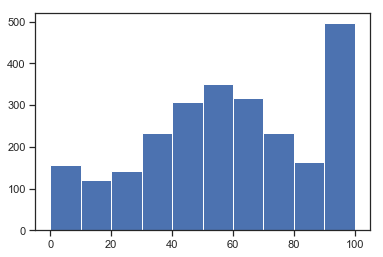

In [429]:
plt.hist(imdb_all['foreign_share'])


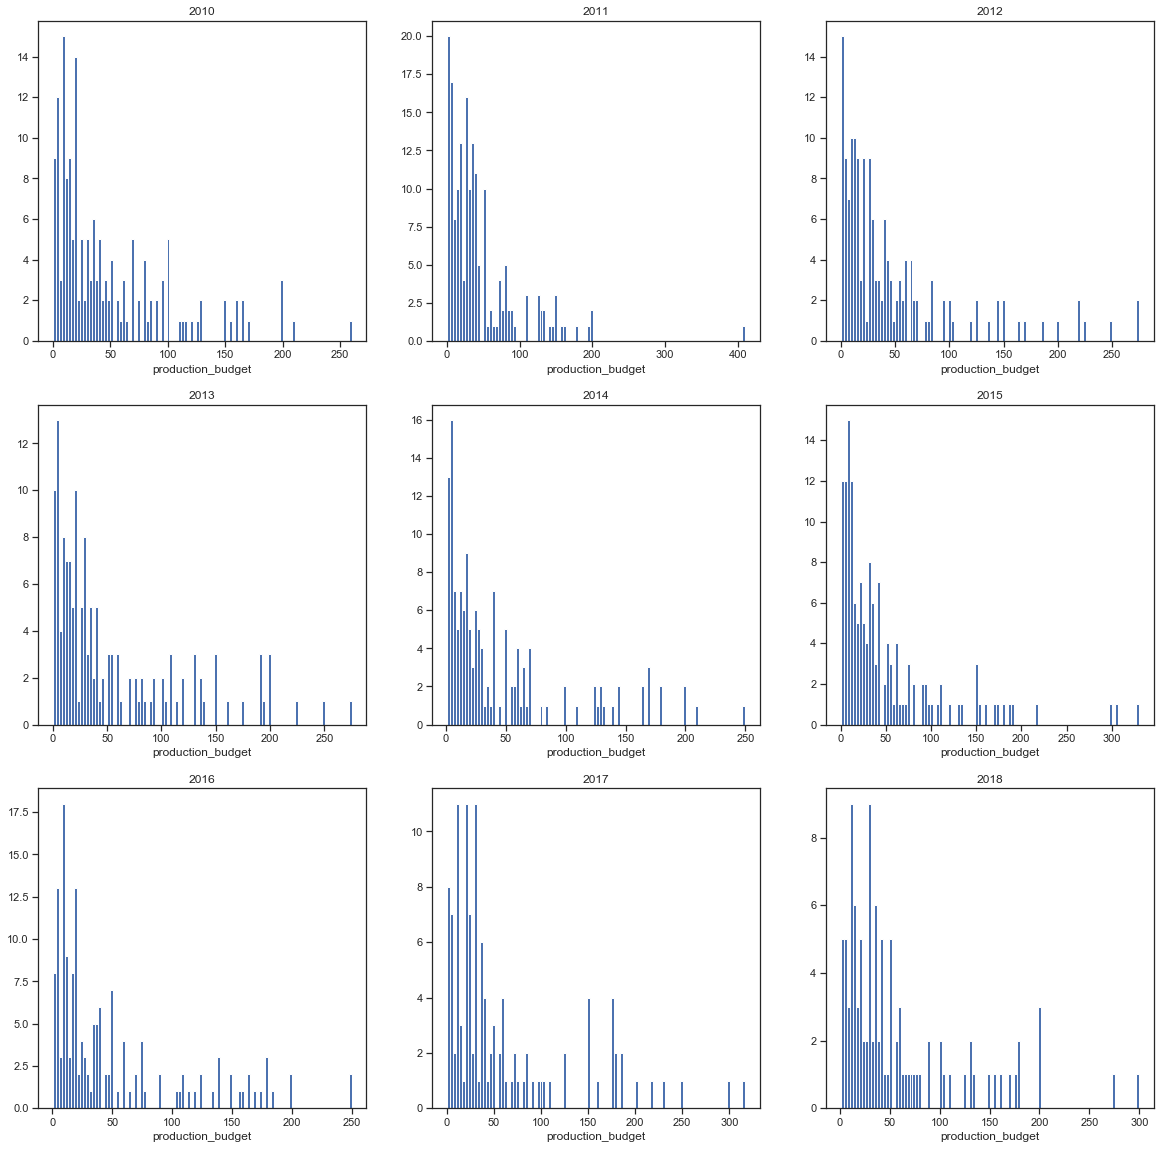

In [756]:
grrrross = ['production_budget']
for g in grrrross:
    plt.figure(figsize=(20,20))
    for i in range(9):
        year=2010+i
        plt.subplot(330+i+1)
        plt.hist(imdb_all[imdb_all.year==year][g], bins=100)
        plt.title(year)
        plt.xlabel(g)
        #plt.savefig(g+".png")
        #plt.loglog()
        #plt.semilogy()

In [571]:
fg1018 = imdb_all.groupby(['year'])['foreign_gross'].mean()
fg1018

year
2010.0    5.811244e+07
2011.0    5.309661e+07
2012.0    6.601106e+07
2013.0    8.018113e+07
2014.0    6.795224e+07
2015.0    8.956301e+07
2016.0    8.437868e+07
2017.0    1.101236e+08
2018.0    1.040561e+08
Name: foreign_gross, dtype: float64

In [572]:
dg1018 = imdb_all.groupby(['year'])['domestic_gross'].mean()
dg1018

year
2010.0    4.222575e+07
2011.0    2.774175e+07
2012.0    2.863495e+07
2013.0    3.254834e+07
2014.0    2.798071e+07
2015.0    2.584022e+07
2016.0    2.680839e+07
2017.0    3.532029e+07
2018.0    3.757642e+07
Name: domestic_gross, dtype: float64

In [573]:
fs1018 = imdb_all.groupby(['year'])['foreign_share'].mean()

In [574]:
fs1018

year
2010.0    51.857613
2011.0    61.208137
2012.0    59.946037
2013.0    59.349231
2014.0    63.877825
2015.0    59.174038
2016.0    56.359737
2017.0    59.804285
2018.0    56.935026
Name: foreign_share, dtype: float64

In [355]:
list(range(2010,2019))

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

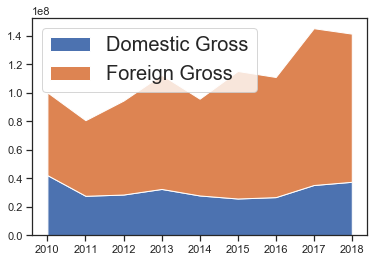

In [585]:
# library
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
# Data
y=range(2010,2019)

 
# Plot
plt.stackplot(y,[dg1018,fg1018], labels=['Domestic Gross','Foreign Gross'])
plt.legend(loc='upper left')
plt.show()


In [690]:
#bldg_df[['Major', 'Minor', 'SqFtTotLiving', 'ZipCode']].copy()
tsp = imdb_all[['domestic_gross','foreign_gross','year']].copy()

In [691]:
tsp.set_index('year', inplace=True)

In [692]:
tsp.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 2930 entries, 2011.0 to 2018.0
Data columns (total 2 columns):
domestic_gross    2911 non-null float64
foreign_gross     1901 non-null float64
dtypes: float64(2)
memory usage: 68.7 KB


In [693]:
tsps = pd.DataFrame(tsp.stack())

In [694]:
pd.DataFrame(tsps).reset_index(inplace=True)

In [695]:
tsps.columns = ['year','domfor','gross']

In [696]:
tsps.head()

,year,domfor,gross
0,2011.0,domestic_gross,241.063875
1,2011.0,foreign_gross,804.600000
2,2015.0,domestic_gross,459.005868
3,2015.0,foreign_gross,944.008095
4,2018.0,domestic_gross,678.815482


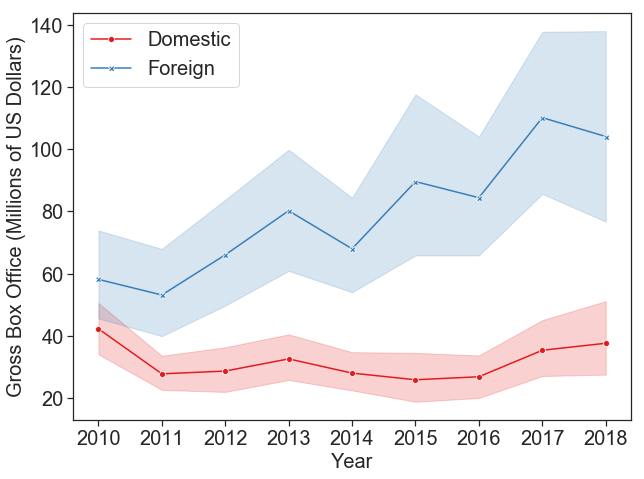

In [954]:
#import matplotlib.font_manager as font_manager

plt.figure(figsize=(10,7.5))

g1 = sns.lineplot(x="year", y="gross", hue="domfor", style="domfor", palette="Set1", markers=True, dashes=False ,data=tsps)
plt.legend(loc='upper left', labels=['Domestic', 'Foreign'], prop={'size': 20})
#plt.title('Domestic vs Foreign Box Office, 2010-2018')
plt.xlabel('Year')
plt.ylabel('Gross Box Office (Millions of US Dollars)')
#font_prop = font_manager.FontProperties(size=20)

for item in ([g1.title, g1.xaxis.label, g1.yaxis.label] +
             g1.get_xticklabels() + g1.get_yticklabels()):
    item.set_fontsize(20)
# plt.rc('legend', fontsize=20)
plt.savefig("1_Graph1DomFor1018.jpg")
plt.show(g1)


<Figure size 1800x720 with 0 Axes>

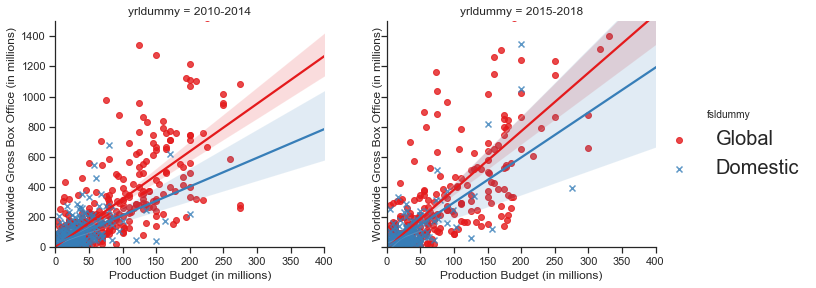

In [946]:
plt.figure(figsize=(25,10))

g3a = sns.lmplot(x="production_budget", y="worldwide_gross", hue="fsldummy", col="yrldummy", 
                data=imdb_all, markers=["o", "x"], palette="Set1")
g3a.set(ylim=(0, 1500))
g3a.set(xlim=(0, 400))
#g2.set(xscale="log", yscale="log")
g3a.set(xlabel='Production Budget (in millions)', ylabel='Worldwide Gross Box Office (in millions)')
# g2._legend.set_title('Foreign revenue share')
# g2._legend.texts(['Low', 'High'])
#plt.legend(loc='upper right', labels=['Domestic', 'Global'], prop={'size': 12})

#plt.savefig("PBGScat.jpg")

# plt.title("Production Budget & Gross Box Office of Movies, by Share of Foreign Revenue")



   

<Figure size 1800x720 with 0 Axes>

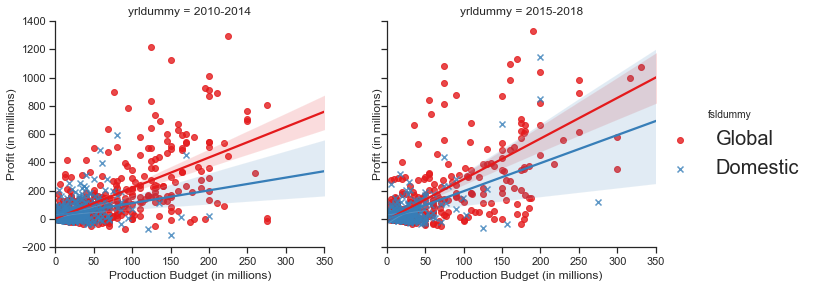

In [997]:
plt.figure(figsize=(25,10))
with sns.plotting_context(font_scale=1):

    g3 = sns.lmplot(x="production_budget", y="profit", hue="fsldummy", col="yrldummy", 
                data=imdb_all, markers=["o", "x"], palette="Set1")
    g3.set(ylim=(-200, 1400))
    g3.set(xlim=(0, 350))
#g2.set(xscale="log", yscale="log")
    g3.set(xlabel='Production Budget (in millions)', ylabel='Profit (in millions)')
#plt.legend(loc='upper right', labels=['Domestic', 'Global'], prop={'size': 12})

plt.savefig("3_PBGScat.jpg")

# plt.title("Production Budget & Gross Box Office of Movies, by Share of Foreign Revenue")



In [911]:
# dogs = animal_shelter_df[(animal_shelter_df['animal'] == 'Dog') & (
#     animal_shelter_df['year'] == 2018)].years_old
hfpd = imdb_all[imdb_all['fgdummy'] == 0].profit.dropna()
lfpd = imdb_all[imdb_all['fgdummy'] == 1].profit.dropna()

Text(0.5, 1.0, 'Density Distribution of Worldwide Gross Box Office by Domestic vs Globally Distributed Films')

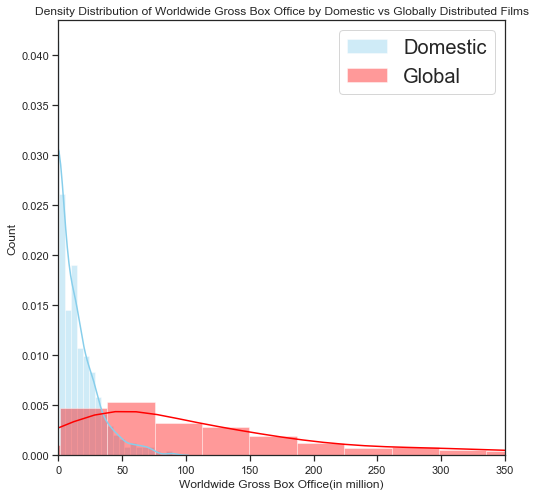

In [912]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
sns.distplot(hfpd , color="skyblue", label="High")
sns.distplot(lfpd , color="red", label="Low")

ax.legend(['Domestic', 'Global'])

ax.set(xlim=(0, 350))
ax.set_xlabel('Worldwide Gross Box Office(in million)')
ax.set_ylabel('Count')
#plt.legend(fontsize='medium', title_fontsize='20')
plt.title('Density Distribution of Worldwide Gross Box Office by Domestic vs Globally Distributed Films')

# plt.show()

In [625]:
imdb_all['regiondummy'].value_counts()

1.0    1903
0.0    1027
Name: regiondummy, dtype: int64

[Text(0, 0.5, 'Worldwide Gross Box Office Revenue (in millions)'),
 Text(0.5, 0, 'Year')]

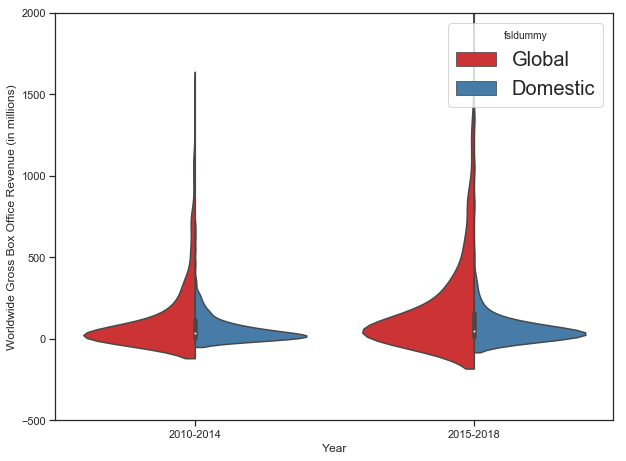

In [966]:
plt.figure(figsize=(10,7.5))

g2 = sns.violinplot(y='worldwide_gross', x="yrldummy", hue="fsldummy", data=imdb_all, 
                    palette="Set1", split=True, scale="width", legend_out= True)

g2.set(ylim=(-500, 2000))
g2.set(xlabel='Year', ylabel='Worldwide Gross Box Office Revenue (in millions)')

#plt.legend(loc='upper left', labels=['Domestic', 'Global'], prop={'size': 12})




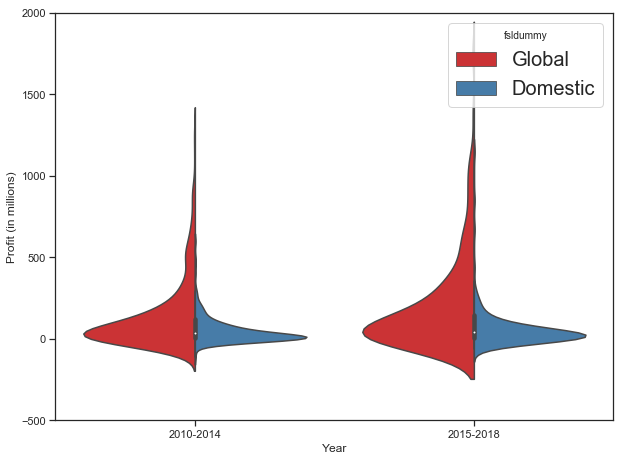

In [968]:
plt.figure(figsize=(10,7.5))

g2a = sns.violinplot(y='profit', x="yrldummy", hue="fsldummy", data=imdb_all, 
                    palette="Set1", split=True, scale="width", legend_out= True)

g2a.set(ylim=(-500, 2000))
g2a.set(xlabel='Year', ylabel='Profit (in millions)')

#plt.legend(loc='upper left', labels=['Domestic', 'Global'], prop={'size': 12})
plt.savefig("2_PBHist.jpg")



In [619]:
# dogs = animal_shelter_df[(animal_shelter_df['animal'] == 'Dog') & (
#     animal_shelter_df['year'] == 2018)].years_old
hfpd = imdb_all[imdb_all['regiondummy'] == 1].production_budget
lfpd = imdb_all[imdb_all['regiondummy'] == 0].production_budget

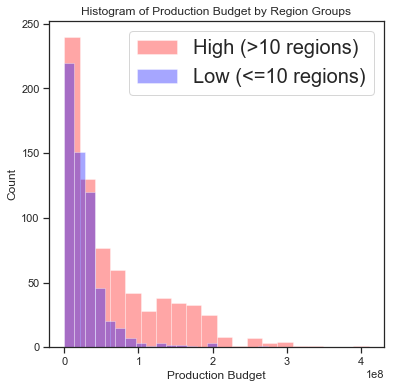

In [626]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1)
plt.hist(hfpd, bins=20, alpha=.35, color='red')
plt.hist(lfpd, bins=20, alpha=.35, color='blue')

ax.legend(['High (>10 regions)', '''Low (<=10 regions)'''])

ax.set_xlabel('Production Budget')
ax.set_ylabel('Count')

ax.set_title('Histogram of Production Budget by Region Groups')
plt.show()

In [860]:
value1p=[]
for i in ugenre:
    d= imdb_all[(imdb_all[i]==1) & (imdb_all['fsdummy']==0)].profit.mean()
    if np.isnan(d) == False:
        value1p.append(d)

In [861]:
value1p

[83.53809834210522,
 97.18941507407409,
 111.53880312500002,
 44.61640880327867,
 47.836174003773586,
 45.817800188118824,
 36.862457636363644,
 32.788953700305804,
 52.15174464102563,
 50.2538962580645,
 54.16491492857143,
 43.76335984722221,
 35.50971662962964,
 -4.8763415000000006,
 40.70027130434782,
 35.402300071428584,
 133.7977667586207,
 33.275471333333336,
 41.636101506024104,
 40.42943720000001,
 51.7266578]

In [862]:
value2p=[]
for i in ugenre:
    d= imdb_all[(imdb_all[i]==1) & (imdb_all['fsdummy']==1)].profit.mean()
    if np.isnan(d) == False:
        value2p.append(d)
value2p

[232.84512843617026,
 317.1839537929689,
 315.90740333333315,
 95.95405901754387,
 165.8151484369369,
 79.6958849072165,
 107.249575,
 81.13717886249994,
 181.8915812162162,
 251.2138758390805,
 89.44799755172414,
 81.80748674626862,
 103.09553835,
 172.596508,
 107.2765442295082,
 81.29693867857144,
 325.1558730740741,
 342.10410340000004,
 148.71279266406248,
 33.21131342857142,
 58.239203]

In [863]:
value1=[]
for i in ugenre:
    d= imdb_all[(imdb_all[i]==1) & (imdb_all['fsdummy']==0)].worldwide_gross.mean()
    if np.isnan(d) == False:
        value1.append(d)

In [816]:
value1

[121.28454568799998,
 138.4047956931818,
 160.681251,
 58.289116493333324,
 67.65025053156153,
 69.53598395495496,
 24.244671350877194,
 46.9343049594937,
 80.53074621428573,
 92.16471200000002,
 58.573636360000016,
 53.11199492207792,
 46.89673282857141,
 21.764154249999997,
 51.10731725490195,
 46.694299196581206,
 175.19853453333326,
 55.190524200000006,
 57.46054209183673,
 35.2303186,
 86.7266578]

In [864]:
value2=[]
for i in ugenre:
    d= imdb_all[(imdb_all[i]==1) & (imdb_all['fsdummy']==1)].worldwide_gross.mean()
    if np.isnan(d) == False:
        value2.append(d)
value2

[269.4935047994722,
 377.56148408544334,
 313.34715819819826,
 78.74785569902915,
 150.55498992670167,
 85.90103537837845,
 60.559419058823536,
 73.4075746912,
 215.80327179245282,
 285.62465256896553,
 69.0464488387097,
 93.05622172727273,
 84.70803519444448,
 172.4636032,
 120.8696920487805,
 67.2930847065868,
 429.21462375294135,
 152.79343692857142,
 155.4876400611112,
 35.310388555555555,
 93.88193179999999]

In [802]:
ugenre= ['Action',
 
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 
 
 'Romance',
 'Sci-Fi',
 
 'Sport',
 
 'Thriller',
 'War',
 'Western']

In [803]:
ugenre

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

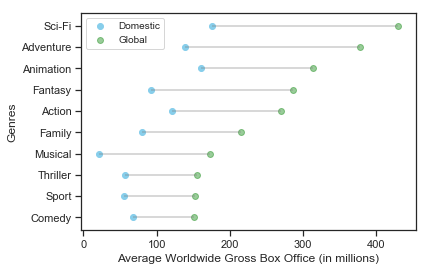

In [969]:
### WorldWide Gross by Genre
# Create a dataframe
df = pd.DataFrame({'group':list(ugenre), 'value1':value1 , 'value2':value2 })
 
# Reorder it following the values of the first value:
ordered_df = df.sort_values(by='value2')
ordered_df=ordered_df.tail(10)
my_range=range(1,len(ordered_df.index)+1)

# The vertical plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
import seaborn as sns
plt.hlines(y=my_range, xmin=ordered_df['value1'], xmax=ordered_df['value2'], color='grey', alpha=0.4)
plt.scatter(ordered_df['value1'], my_range, color='skyblue', alpha=1, label='Domestic')
plt.scatter(ordered_df['value2'], my_range, color='green', alpha=0.4 , label='Global')
plt.legend(prop={'size': 10})

# Add title and axis names
plt.yticks(my_range, ordered_df['group'])
#plt.title("Worldwide Gross Box Office Comparison of Domestic and Globally Distributed Films by Genres")
plt.xlabel('Average Worldwide Gross Box Office (in millions)')
plt.ylabel('Genres')
plt.savefig("4a_WGGENR.jpg")


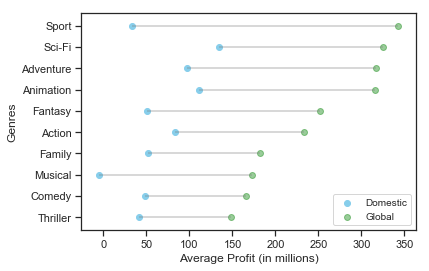

In [970]:
### Profit by Genre
# Create a dataframe
df = pd.DataFrame({'group':list(ugenre), 'value1':value1p , 'value2':value2p })
 
# Reorder it following the values of the first value:
#ordered_df = df.sort_values(by='value2')

ordered_df = df.sort_values(by='value2')
ordered_df=ordered_df.tail(10)
my_range=range(1,len(ordered_df.index)+1)
 
# The vertical plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
import seaborn as sns
plt.hlines(y=my_range, xmin=ordered_df['value1'], xmax=ordered_df['value2'], color='grey', alpha=0.4)
plt.scatter(ordered_df['value1'], my_range, color='skyblue', alpha=1, label='Domestic')
plt.scatter(ordered_df['value2'], my_range, color='green', alpha=0.4 , label='Global')
plt.legend(prop={'size': 10})

# Add title and axis names
plt.yticks(my_range, ordered_df['group'])
#plt.title("Profit Comparison of Domestic and Globally Distributed Films by Genres")
plt.xlabel('Average Profit (in millions)')
plt.ylabel('Genres')
plt.savefig("4b_PGENR.jpg")


In [882]:
imdb_all.columns

Index(['Unnamed: 0', 'movie', 'title', 'id_y', 'release_date',
       'production_budget', 'date', 'studio', 'year', 'domestic_gross',
       'worldwide_gross', 'title_id', 'festival', 'D3', 'IMAX', 'title_y',
       'region', 'language', 'types', 'attributes', 'tconst_x',
       'primary_title', 'original_title', 'start_year', 'runtime_minutes',
       'genres', 'Adventure', 'Action', 'Horror', 'Sci-Fi', 'Fantasy',
       'History', 'Sport', 'Biography', 'Musical', 'Game-Show', 'Mystery',
       'Crime', 'Short', 'Talk-Show', 'Thriller', 'Drama', 'Reality-TV',
       'Adult', 'Animation', 'Documentary', 'Family', 'Western', 'War',
       'Romance', 'News', 'Comedy', 'Music', 'archive_sound', 'writer',
       'producer', 'actress', 'director', 'composer', 'cinematographer',
       'self', 'editor', 'production_designer', 'actor', 'archive_footage',
       'archive_footage_age', 'editor_age', 'director_age', 'actor_age',
       'production_designer_age', 'actress_age', 'writer_age', 'se

In [990]:
imdb_all.actress_ratio.describe()

count    2759.000000
mean        0.383625
std         0.230451
min         0.000000
25%         0.250000
50%         0.375000
75%         0.500000
max         1.000000
Name: actress_ratio, dtype: float64

In [889]:
imdb_all.loc[imdb_all['actorage']>40, 'agrdummy'] = "Old Actors"

In [890]:
imdb_all.loc[imdb_all['actorage']<=40, 'agrdummy'] = "Young Actors"

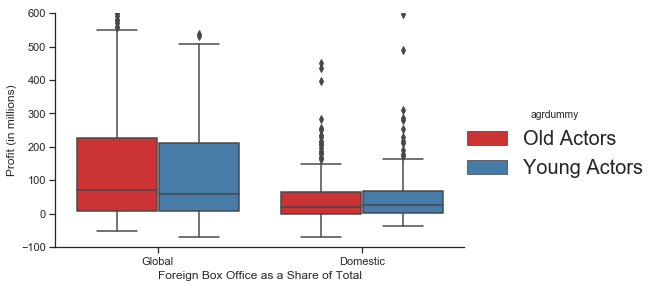

In [1011]:
g5 = sns.catplot(y="profit", x="fsldummy", hue="agrdummy", data=imdb_all, palette="Set1", kind='box', aspect= 1.5, height=5)
g5.set(ylim=(-100, 600))
# g5.set(xlim=(0, 300))
g5.set(xlabel='Foreign Box Office as a Share of Total', ylabel='Profit (in millions)')



plt.savefig("5a_ACTRAGE.jpg")


In [1006]:
imdb_all.loc[imdb_all['actressage']>35, 'asgrdummy'] = "Old Actresses"

In [1007]:
imdb_all.loc[imdb_all['actressage']<=35, 'asgrdummy'] = "Young Actresses"

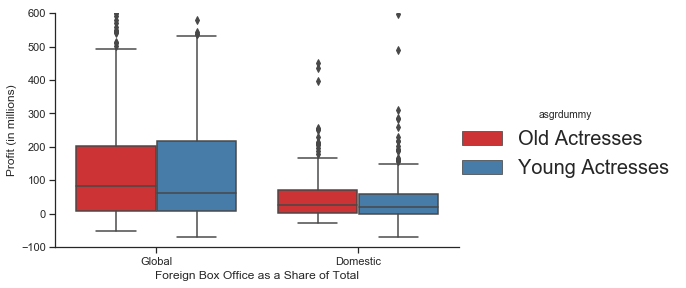

In [1010]:
g5 = sns.catplot(y="profit", x="fsldummy", hue="asgrdummy", data=imdb_all, palette="Set1", kind='box', aspect= 1.5, height=5)
g5.set(ylim=(-100, 600))
g5.set(xlabel='Foreign Box Office as a Share of Total', ylabel='Profit (in millions)')

# g5.set(xlim=(0, 300))
plt.savefig("5b_ACTRSAGE.jpg")


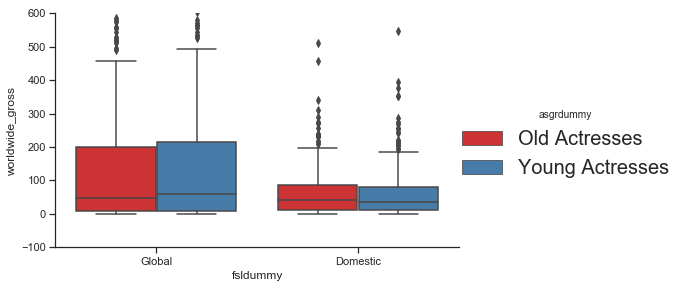

In [1009]:
g5 = sns.catplot(y="worldwide_gross", x="fsldummy", hue="asgrdummy", data=imdb_all, palette="Set1", kind='box', aspect= 1.5, height=5)
g5.set(ylim=(-100, 600))
# g5.set(xlim=(0, 300))

<Figure size 1800x720 with 0 Axes>

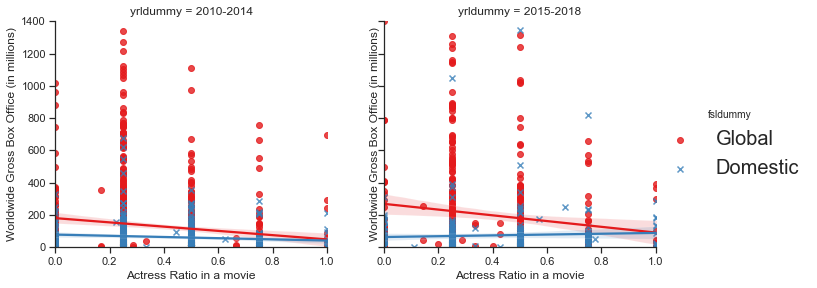

In [1001]:
plt.figure(figsize=(25,10))
with sns.plotting_context(font_scale=1):

    g3 = sns.lmplot(x="actress_ratio", y="worldwide_gross", hue="fsldummy", col="yrldummy", 
                data=imdb_all, markers=["o", "x"], palette="Set1")
    g3.set(ylim=(0, 1400))
    g3.set(xlim=(0, 1))
#g2.set(xscale="log", yscale="log")
    g3.set(xlabel='Actress Ratio in a movie', ylabel='Worldwide Gross Box Office (in millions)')
#plt.legend(loc='upper right', labels=['Domestic', 'Global'], prop={'size': 12})


# plt.title("Production Budget & Gross Box Office of Movies, by Share of Foreign Revenue")



# Notes

In [331]:
colums_of_interest = ['domestic_gross', 'worldwide_gross', 'foreign_gross', 'profit', 'profitrate', 'foreign_share']

In [332]:
sns.set(style="ticks", color_codes=True)

/Users/ptw/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/ptw/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


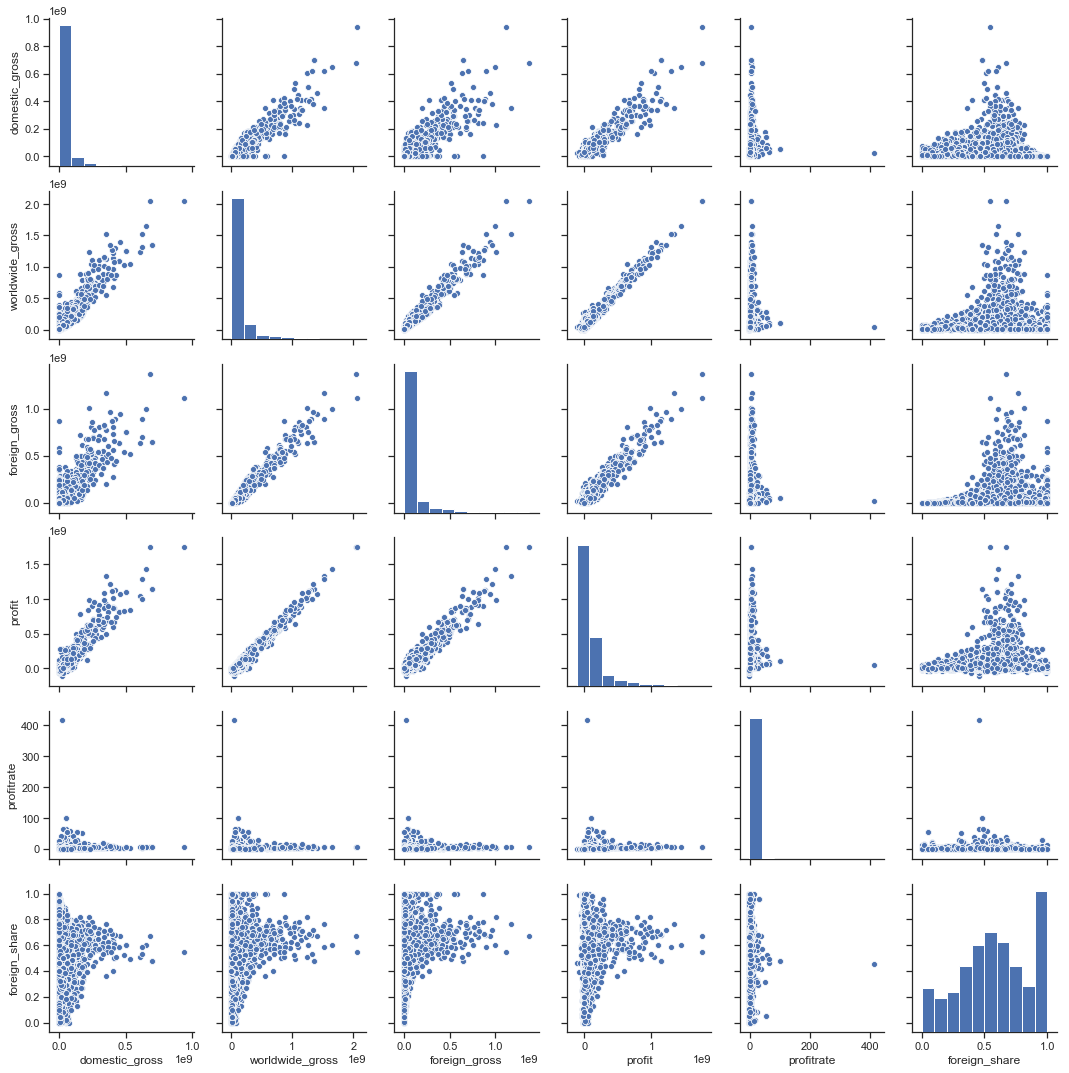

In [339]:
g = sns.pairplot(imdb_all, vars=colums_of_interest)

/Users/ptw/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/ptw/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


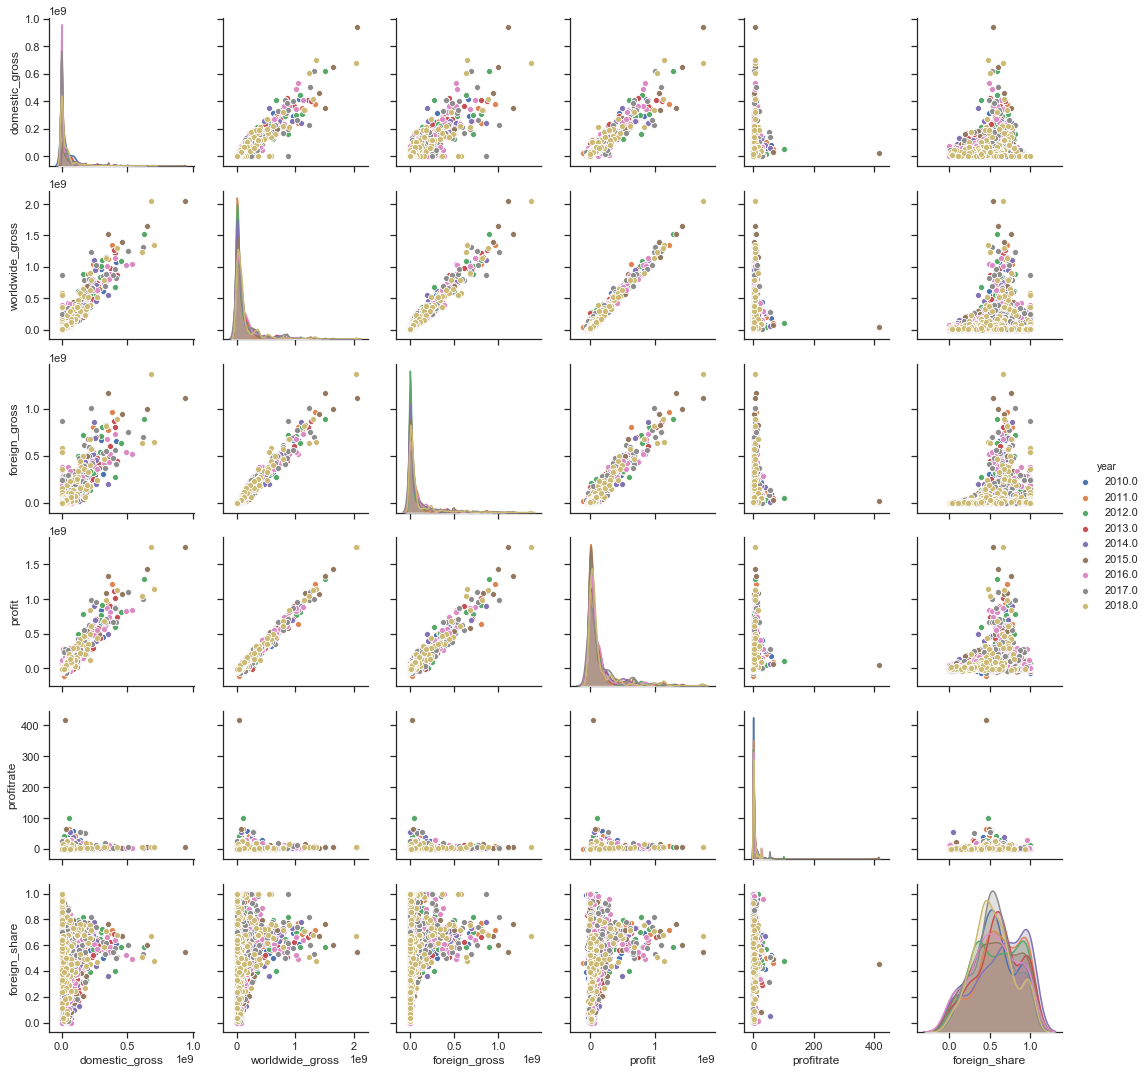

In [338]:
g2 = sns.pairplot(imdb_all, vars=colums_of_interest, hue="year")

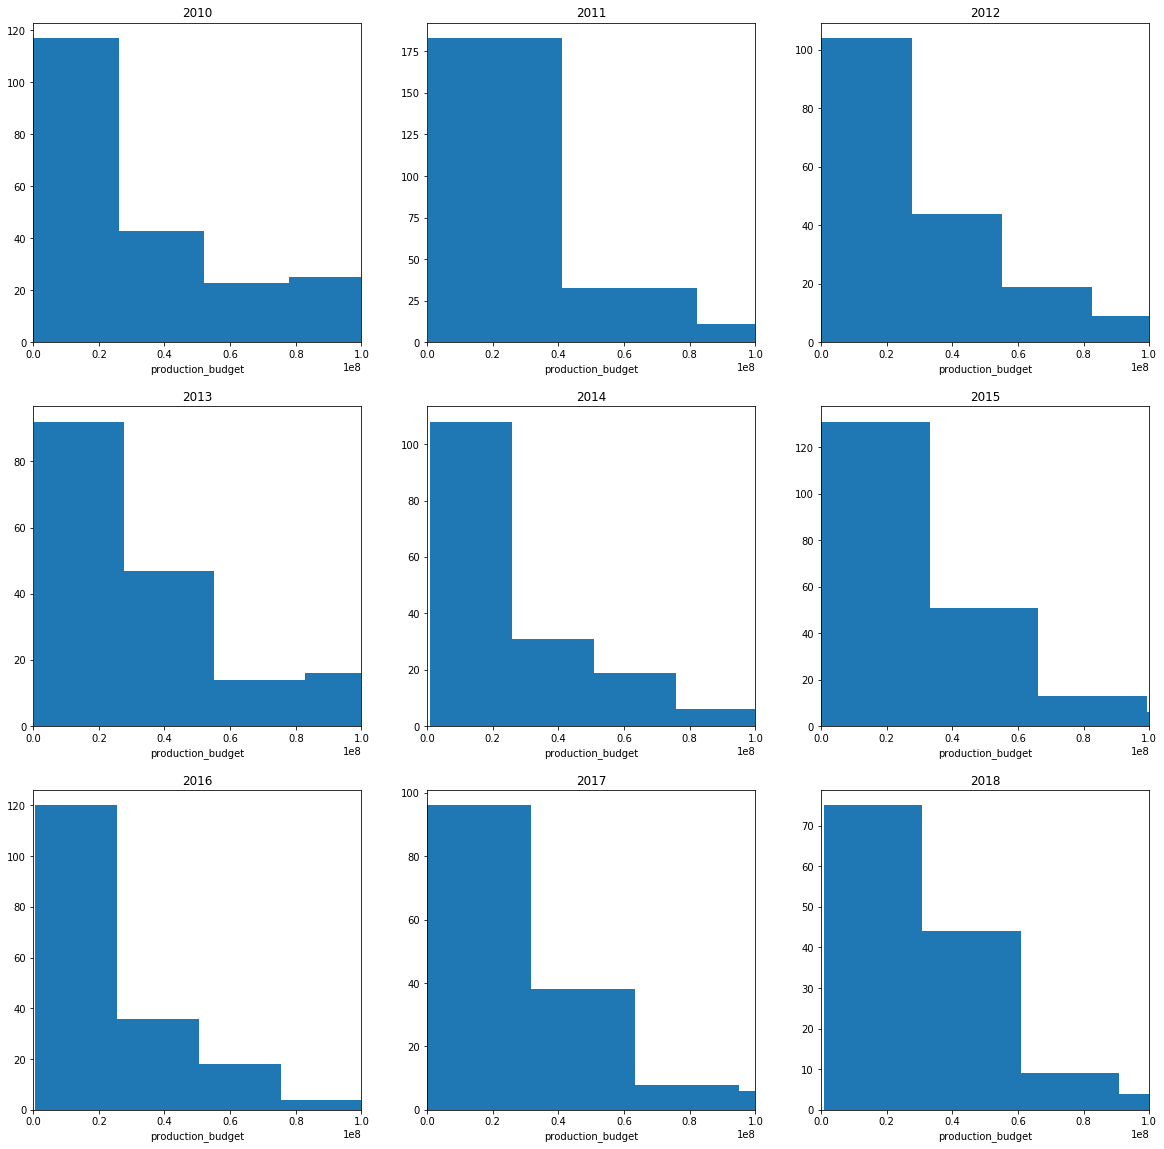

In [271]:
plt.figure(figsize=(20,20))
for i in range(9):
    year=2010+i
    plt.subplot(330+i+1)
    plt.hist(imdb_all[imdb_all.year==year]['production_budget'])
    plt.title(year)
    plt.xlim(0,100000000)
    plt.xlabel('production_budget')
   # plt.savefig('domestic_gross.png')
   # plt.loglog()

In [281]:
from sklearn.preprocessing import MinMaxScaler


In [308]:
myscaler = MinMaxScaler()
myscaler.fit(imdb_all[['foreign_gross', 'production_budget']].dropna().values)
imdb_scaled=myscaler.transform(imdb_all[['foreign_gross', 'production_budget']].dropna().values)

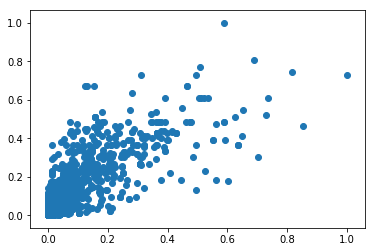

In [319]:
plt.scatter(imdb_scaled.T[0], imdb_scaled.T[1])

In [317]:
imdb_scaled.T[1].size


1813

In [318]:
imdb_scaled.T[2].size


IndexError: index 2 is out of bounds for axis 0 with size 2

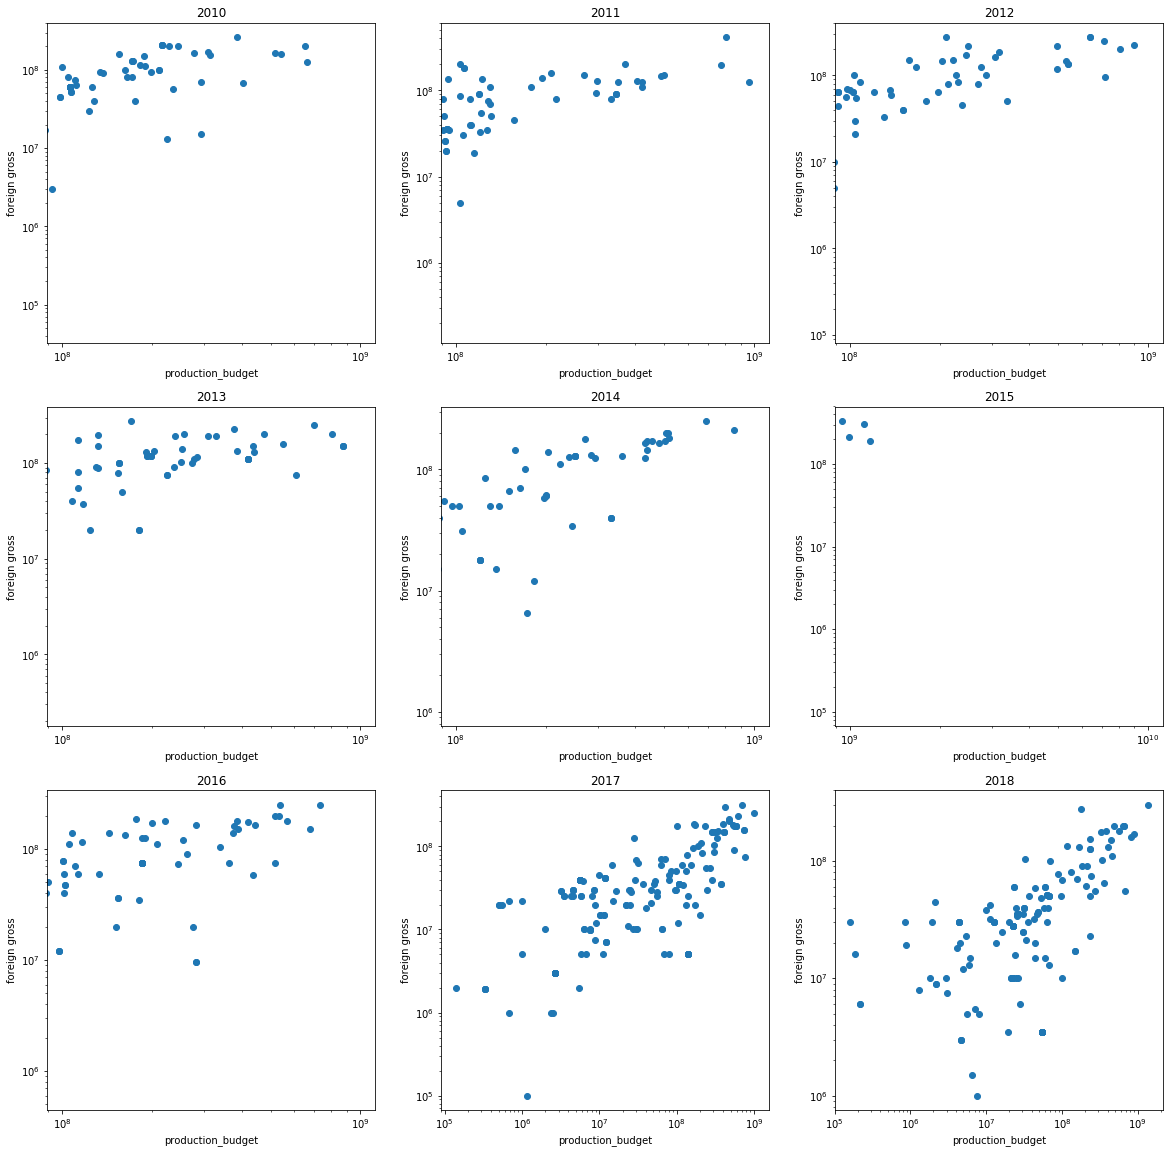

In [279]:

plt.figure(figsize=(20,20),font)
for i in range(9):
    year=2010+i
    plt.subplot(330+i+1)
    plt.scatter(imdb_all[imdb_all.year==year]['foreign_gross'],imdb_all[imdb_all.year==year]['production_budget'])
    plt.title(year)
    #plt.xlim(0,1000000000)
    plt.xlabel('production_budget')
    plt.ylabel('foreign gross')
   # plt.semilogy()   
        # plt.savefig('domestic_gross.png')
    plt.loglog()

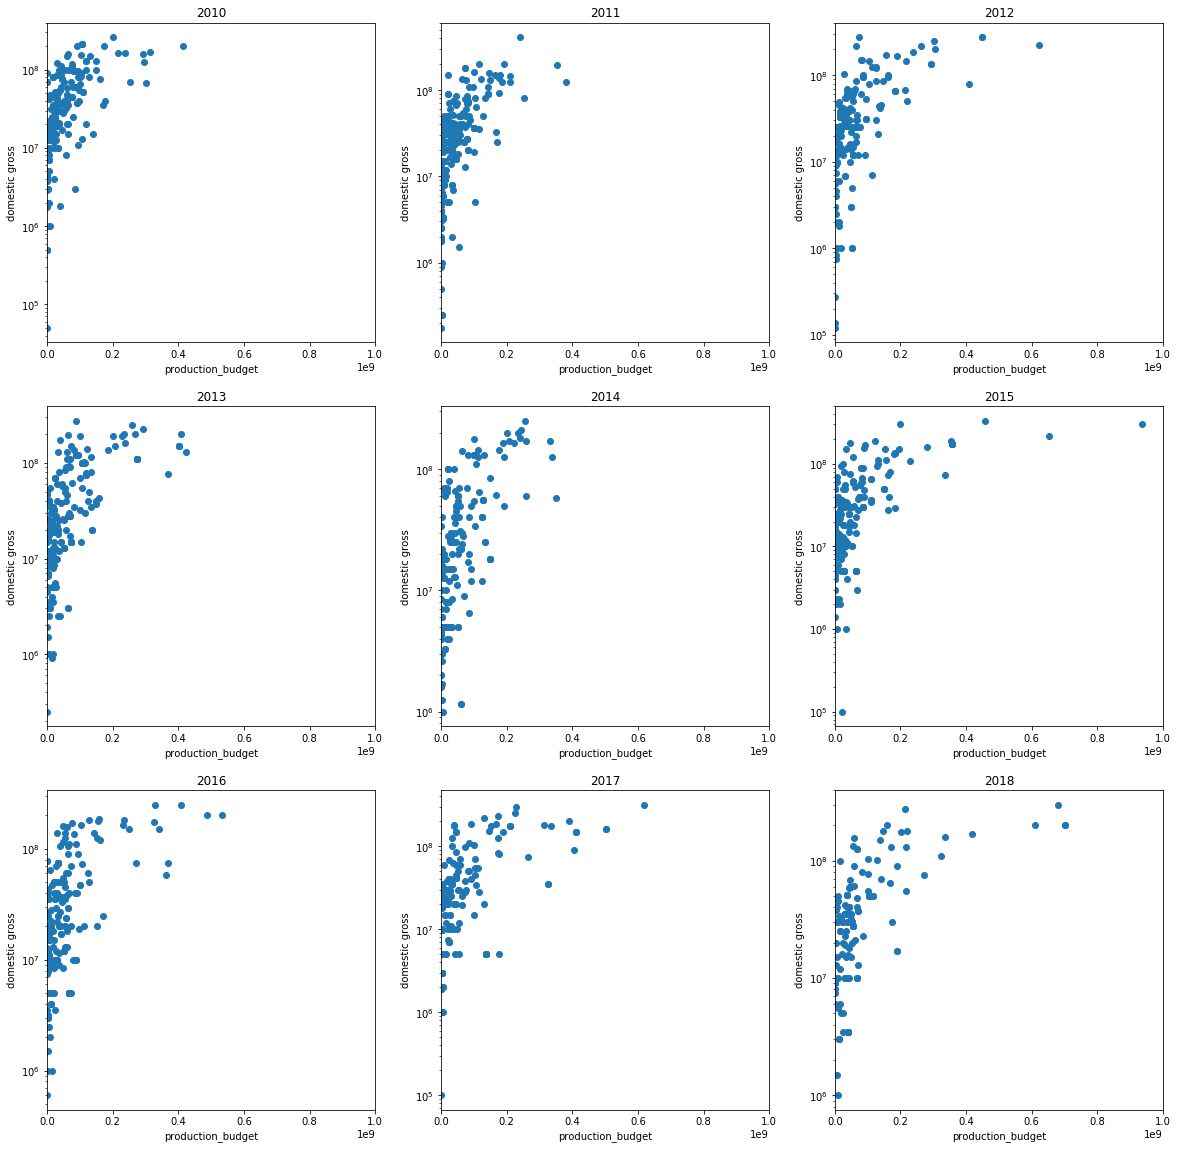

In [277]:
plt.figure(figsize=(20,20))
for i in range(9):
    year=2010+i
    plt.subplot(330+i+1)
    plt.scatter(imdb_all[imdb_all.year==year]['domestic_gross'],imdb_all[imdb_all.year==year]['production_budget'])
    plt.title(year)
    plt.xlim(0,1000000000)
    plt.xlabel('production_budget')
    plt.ylabel('domestic gross')
    plt.semilogy()   
        # plt.savefig('domestic_gross.png')
   # plt.loglog()

#### How to explode a column... turn out we don't need it, but leaving it in in case we need it later.

In [291]:
ndf2 = pd.DataFrame(df2.known_for_titles.str.split(',').fillna('').tolist(), index=df2.nconst).stack()
ndf2.head()

nconst      
nm0061671  0    tt0837562
           1    tt2398241
           2    tt0844471
           3    tt0118553
nm0061865  0    tt0896534
dtype: object

In [230]:
#ndf3 = pd.DataFrame(df3.genres.str.split(",").tolist(), index = df3['tconst']).stack()

In [293]:
ndf2 = ndf2.reset_index([0,'nconst'])

In [294]:
ndf2.columns=['nconst','known_for_titles']
ndf2.head()

,nconst,known_for_titles
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [4]:
df1 = pd.read_csv('imdb.name.basics.csv.gz')

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [107]:
df1 = pd.read_csv("bom.movie_gross.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [26]:
title1= set(df1['title'].values)
title1

{'The Mortal Instruments: City of Bones',
 'Tevar',
 'Experimenter',
 'Death Wish (2018)',
 'Viva Riva!',
 'Special Treatment',
 'Hesher',
 'Tyrannosaur',
 'Admission',
 'Ode to My Father',
 'Canopy',
 'Unforgettable (2017)',
 'Beloved (2012)',
 'The Town',
 'Let Me In',
 'Never Let Me Go',
 'The Man From U.N.C.L.E.',
 'Hitchcock',
 'Lovelace',
 'Delivery Man',
 'Interstellar',
 'Before We Go',
 'The Commuter',
 'One Direction: This is Us',
 'Stone',
 'Monster Trucks',
 'The Mystery of Happiness',
 'Cave of Forgotten Dreams',
 'The Breadwinner',
 'Cuban Fury',
 'REC 4: Apocalypse',
 'Bride Flight',
 'The Double',
 'The Fortress',
 'The Concert',
 'A Prophet (Un prophète)',
 'We Have a Pope',
 'Heaven Knows What',
 'The Wild Life (2016)',
 'Footloose (2011)',
 'Trollhunter',
 'Remember (US Release)',
 'Magic Mike XXL',
 'Pacific Rim Uprising',
 'Buddies in India',
 'Korkoro',
 'Sucker Punch',
 'Suspiria',
 'When the Bough Breaks',
 'Hungry Hearts',
 'X-Men: First Class',
 'On the Road',

In [29]:
len(title1)

3386

In [28]:
title2=set(df11['movie'].values)
title2

{'Hancock',
 'Igby Goes Down',
 'Close Range',
 'The Family Stone',
 'Admission',
 'The Town',
 'Northfork',
 'Interstellar',
 'One Direction: This is Us',
 'Stone',
 'Gory Gory Hallelujah',
 'Collateral Damage',
 'Fateless',
 'Hoodwinked Too: Hood vs. Evil',
 'The Fits',
 'The Tale of Despereaux',
 '20 Dates',
 'Leatherheads',
 'Sucker Punch',
 "Pooh's Heffalump Movie",
 'A Beautiful Mind',
 'Miss Julie',
 'Blood and Chocolate',
 'Barbarella',
 'Freddy vs. Jason',
 'Star Trek: Generations',
 'Up in the Air',
 'La Cara Oculta',
 'Mollyâ\x80\x99s Game',
 'Unbreakable',
 'Jurassic Park',
 'Instant Family',
 'American Pie 2',
 'Le Petit Nicolas',
 'Black Hawk Down',
 'Mar adentro',
 'Theresa Is a Mother',
 'AimÃ©e & Jaguar',
 'Little Miss Sunshine',
 'London to Brighton',
 'Apollo 13',
 'Eight Legged Freaks',
 'The Algerian',
 'Kung Fu Panda 2',
 'Pixels',
 'Pride & Prejudice',
 'Garfield: The Movie',
 'Yi ge ren de wu lin',
 'You Again',
 'Mud',
 'Darkness',
 'Air Strike',
 'F.I.S.T',
 '

In [31]:
tdiff = title2 - title1
len(tdiff)

4460

In [32]:
tdiff1= title1 - title2
len(tdiff1)

2148

In [33]:
tint = title1 & title2

In [34]:
len(tint)

1238

In [35]:
3386-2148

1238

In [30]:
len(title2)

5698

In [38]:
dfmerge = df1.merge(df11, left_on='title', right_on='movie',how='inner')
dfmerge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 1246
Data columns (total 11 columns):
title                1247 non-null object
studio               1246 non-null object
domestic_gross_x     1245 non-null float64
foreign_gross        1086 non-null object
year                 1247 non-null int64
id                   1247 non-null int64
release_date         1247 non-null object
movie                1247 non-null object
production_budget    1247 non-null object
domestic_gross_y     1247 non-null object
worldwide_gross      1247 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 116.9+ KB


In [39]:
dfmerge.head()

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010",Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,"$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010",Iron Man 2,"$170,000,000","$312,433,331","$621,156,389"


In [74]:
join1 = df1.merge(lmap, left_on='title', right_on = 't2', how= 'inner')
join2 = join1.merge(df11, left_on='t1', right_on = 'movie', how='inner')
join2.head(100)

,title,studio,domestic_gross_x,foreign_gross,year,t1,t2,score,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,Harry Potter and the Deathly Hallows: Part I,Harry Potter and the Deathly Hallows Part 1,0.045455,64,"Nov 19, 2010",Harry Potter and the Deathly Hallows: Part I,"$125,000,000","$296,131,568","$960,431,568"
1,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000,2011,Harry Potter and the Deathly Hallows: Part I,Harry Potter and the Deathly Hallows Part 2,0.045455,64,"Nov 19, 2010",Harry Potter and the Deathly Hallows: Part I,"$125,000,000","$296,131,568","$960,431,568"
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,Harry Potter and the Deathly Hallows: Part II,Harry Potter and the Deathly Hallows Part 1,0.066667,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,"$125,000,000","$381,193,157","$1,341,693,157"
3,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000,2011,Harry Potter and the Deathly Hallows: Part II,Harry Potter and the Deathly Hallows Part 2,0.066667,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,"$125,000,000","$381,193,157","$1,341,693,157"
4,Tron Legacy,BV,172100000.0,228000000,2010,Tron: Legacy,Tron Legacy,0.083333,58,"Dec 17, 2010",Tron: Legacy,"$200,000,000","$172,062,763","$400,062,763"
5,Percy Jackson & The Olympians: The Lightning T...,Fox,88800000.0,137700000,2010,Percy Jackson & the Olympians: The Lightning T...,Percy Jackson & The Olympians: The Lightning T...,0.020000,17,"Feb 12, 2010",Percy Jackson & the Olympians: The Lightning T...,"$95,000,000","$88,768,303","$223,050,874"
6,Jackass 3-D,Par.,117200000.0,54500000,2010,Jackass 3D,Jackass 3-D,0.090909,98,"Oct 15, 2010",Jackass 3D,"$20,000,000","$117,229,692","$171,685,793"
7,Step Up 3-D,BV,42400000.0,116900000,2010,Step Up 3D,Step Up 3-D,0.090909,9,"Aug 6, 2010",Step Up 3D,"$30,000,000","$42,400,223","$165,889,117"
8,Wall Street: Money Never Sleeps,Fox,52500000.0,82300000,2010,Wall Street 2: Money Never Sleeps,Wall Street: Money Never Sleeps,0.060606,24,"Sep 24, 2010",Wall Street 2: Money Never Sleeps,"$70,000,000","$52,474,616","$137,431,619"
9,The Back-Up Plan,CBS,37500000.0,40000000,2010,The Back-up Plan,The Back-Up Plan,0.062500,75,"Apr 23, 2010",The Back-up Plan,"$35,000,000","$37,490,007","$75,281,179"


In [40]:
!pip install StringDist

  Stored in directory: /Users/ptw/Library/Caches/pip/wheels/c3/1b/bb/bf0de4d64d8ca38759811fe3353e441f12feb606fb3d1d2e11
Successfully built StringDist


In [43]:
import stringdist as sd 
sd.levenshtein_norm('test', 'testing')

0.42857142857142855

In [51]:
def leven(tdiff, tdiff1):
    t1=[]
    t2=[]
    score=[]
    for i in tdiff:
        for j in tdiff1:
            t1.append(i)
            t2.append(j)
            score.append(sd.levenshtein_norm(i, j))     
    ldf = pd.DataFrame({'t1':t1, 't2':t2, 'score':score})
    return ldf
#print(t1, t2, score)                     
#

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [52]:
ldf = pd.DataFrame({'t1':t1, 't2':t2, 'score':score})

In [67]:
lmap = ldf[ldf['score']<0.1]

In [85]:
lmap = ldf[ldf['score']<0.3]

In [86]:
lmap = lmap.sort_values(by='score')

In [87]:
lmap

,t1,t2,score
436901,Percy Jackson & the Olympians: The Lightning T...,Percy Jackson & The Olympians: The Lightning T...,0.020000
4533840,"The Twilight Saga: Breaking Dawn, Part 1",The Twilight Saga: Breaking Dawn Part 1,0.025000
5928319,"The Twilight Saga: Breaking Dawn, Part 2",The Twilight Saga: Breaking Dawn Part 2,0.025000
6849526,Fantastic Beasts and Where to Find Them,Fantastic Beasts and Where To Find Them,0.025641
6740513,A Million Ways to Die in The West,A Million Ways to Die in the West,0.030303
9360507,Thunder and the House of Magic,Thunder and the House of Magic!,0.032258
2507789,House at the End of the Street,House at the End of The Street,0.033333
3576559,In The Land of Blood and Honey,In the Land of Blood and Honey,0.033333
4423746,Guardians of the Galaxy Vol 2,Guardians of the Galaxy Vol. 2,0.033333
107137,Hoodwinked Too: Hood vs. Evil,Hoodwinked Too! Hood vs. Evil,0.034483


In [88]:
lmap.to_csv(r'/Users/ptw/dc_ds_06_03_19/module_1/week_3_project/data/levenshtein.csv')

Here's the less fun part: going through the list manually and take out the movies that have similar titles but are not the same, e.g. 15 minutes / 13 minutes, Midnight Sun/ Midnight Run, Popeye/Pop Aye, Jeepers Creepers II/ Jeepers Creepers 3. 

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

(array([0.00000e+00, 0.00000e+00, 4.00000e+00, 9.00000e+00, 1.20000e+01,
        1.20000e+01, 1.00000e+01, 1.20000e+01, 8.00000e+00, 9.00000e+00,
        1.00000e+01, 6.00000e+00, 5.00000e+00, 9.00000e+00, 6.00000e+00,
        6.00000e+00, 1.20000e+01, 9.00000e+00, 1.40000e+01, 1.00000e+00,
        3.10000e+01, 1.20000e+01, 1.60000e+01, 2.10000e+01, 2.00000e+00,
        6.30000e+01, 1.40000e+01, 3.60000e+01, 5.90000e+01, 6.00000e+00,
        7.40000e+01, 3.70000e+01, 2.00000e+00, 2.65000e+02, 1.80000e+01,
        9.30000e+01, 1.93000e+02, 2.83000e+02, 1.61000e+02, 7.00000e+00,
        5.53000e+02, 4.00000e+02, 4.60000e+02, 1.98000e+02, 7.78000e+02,
        8.95000e+02, 9.44000e+02, 5.11000e+02, 9.50000e+01, 0.00000e+00,
        6.19500e+03, 8.60000e+01, 1.88900e+03, 4.10400e+03, 3.16100e+03,
        3.84700e+03, 3.17000e+03, 7.78400e+03, 8.25100e+03, 1.69800e+03,
        1.43290e+04, 1.44220e+04, 1.31900e+04, 1.54500e+04, 2.32750e+04,
        1.30520e+04, 6.11270e+04, 5.53200e+03, 5.05

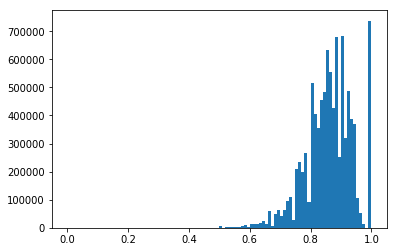

In [61]:
plt.hist(ldf['score'].values, bins=np.linspace(0,1,101))

(array([3.00000e+01, 2.79000e+02, 0.00000e+00, 1.70000e+01, 1.04000e+02,
        4.10000e+01, 7.00000e+00, 0.00000e+00, 5.24000e+02, 1.00000e+00,
        2.80000e+01, 1.00000e+02, 2.97000e+02, 5.50000e+01, 0.00000e+00,
        4.08000e+02, 2.00000e+01, 1.97000e+02, 7.52000e+02, 7.00000e+00,
        6.10000e+01, 8.34000e+02, 5.30000e+02, 4.13000e+02, 2.32000e+02,
        2.34000e+02, 1.19000e+02, 2.00000e+01, 2.00000e+00, 0.00000e+00,
        6.19500e+03, 0.00000e+00, 1.00000e+00, 3.10000e+01, 2.50000e+02,
        7.99000e+02, 9.06000e+02, 1.74700e+03, 2.56500e+03, 2.94100e+03,
        7.31000e+02, 3.11600e+03, 3.06800e+03, 1.02000e+02, 5.96800e+03,
        1.91900e+03, 8.13300e+03, 1.66500e+03, 1.28360e+04, 9.10000e+01,
        6.10200e+03, 7.37800e+03, 1.47990e+04, 7.96000e+02, 1.53220e+04,
        1.30410e+04, 1.66680e+04, 6.24600e+03, 5.44000e+02, 6.10700e+04,
        1.48700e+03, 1.82300e+04, 3.66720e+04, 3.16730e+04, 3.83710e+04,
        3.85350e+04, 6.25660e+04, 4.58380e+04, 1.04

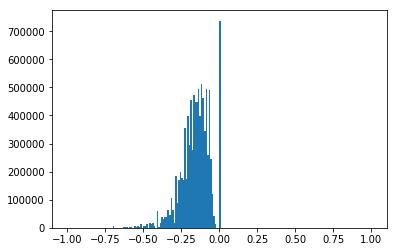

In [66]:
plt.hist(np.log(ldf['score'].values), np.linspace(-1, 1, 201))